In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = "/content/Datathon 2025-09 Business Problem 1.xlsx"
df = pd.read_excel(file_path, sheet_name="Dataset")

FileNotFoundError: [Errno 2] No such file or directory: '/content/Datathon 2025-09 Business Problem 1.xlsx'

In [ ]:
df.head()

In [ ]:
print("Original Shape:", df.shape)

In [ ]:
df.isnull()

In [ ]:
df.isnull().sum()

In [ ]:
df['MERCHANTDESC'] = df['MERCHANTDESC'].fillna("Unknown Merchant")

In [ ]:
df.isnull().sum().sum()

In [ ]:
df.isnull().any()

In [ ]:
duplicates = df.duplicated().sum()

In [ ]:
duplicates

In [ ]:
print("Duplicate Rows:", duplicates)

In [ ]:
# df['MTH_INCOME'] = df['MTH_INCOME'].replace(0, pd.NA)

In [ ]:
# df['FICO_AT_ACCT_OPEN'] = df['FICO_AT_ACCT_OPEN'].replace(0, pd.NA)

In [ ]:
# df['END_OF_MONTH_FICO'] = df['END_OF_MONTH_FICO'].replace(0, pd.NA)

In [ ]:
df = df.drop_duplicates()

In [ ]:
print("After Dropping Duplicates:", df.shape)

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


In [ ]:
print("\nCleaned Dataset Shape:", df.shape)

In [ ]:
print("\nNumeric Summary:\n", df.describe())

Utilization ratio (balance ÷ limit) → credit risk metric.
Transaction month → time trend analysis.

In [ ]:
df['UTILIZATION'] = df['END_OF_MTH_BALANCE'] / df['CREDIT_LMT']

In [ ]:
df['TRANSACTION_MONTH'] = df['TRANSACTIONDT'].dt.to_period('M')

In [ ]:
print("Unique Customers:", df['ACCOUNT'].nunique())

# Customer Demographics & Income Insights

## Generation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df.drop_duplicates('ACCOUNT'), x='GENERATION', order=df['GENERATION'].value_counts().index)
plt.title("Customer Distribution by Generation")
plt.ylabel("Number of Customers")
plt.xticks(rotation=30)
plt.show()

FNBO’s secured card customers are predominantly Gen Z and Millennials. They look “new-to-credit”, maybe starting to build history with their first credit card. They have high potential for FNBO to graduate them to unsecured credit products. So, FNBO should design financial literacy tools and graduation pathways targeting these younger generations.

## Monthly Income

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df.drop_duplicates('ACCOUNT')['MTH_INCOME'].dropna(), bins=50, kde=True)
plt.title("Distribution of Monthly Income (Customers)")
plt.xlabel("Monthly Income")
plt.show()

Most customers report incomes in the 2,000–6,000 range with the distribution peaking around 4,000. There are a few customers with very high incomes (up to $50,000). This indicates that the secured card portfolio mainly serves lower-to-middle income customers, which makes sense since the product is designed for individuals who are new to credit or rebuilding credit. May be FNBO can tailor products and graduation strategies around customers with modest income levels while being mindful of the small group of higher earners.

# Product Usage Insights

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['CREDIT_LMT'], bins=30, kde=False)
plt.title("Distribution of Credit Limits")
plt.xlabel("Credit Limit")
plt.show()

NameError: name 'df' is not defined

<Figure size 1000x500 with 0 Axes>

Most customers have very low credit limits between 300 and 600. There is a sharp drop-off after 1,000, with only a small number of customers receiving higher limits (up to 5,000). FNBO can design graduation paths or credit line increase programs for customers who consistently demonstrate responsible use, moving them from 300–500 limits to higher unsecured credit lines.

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['TRANSACTIONAMT'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.show()

NameError: name 'df' is not defined

<Figure size 1000x500 with 0 Axes>

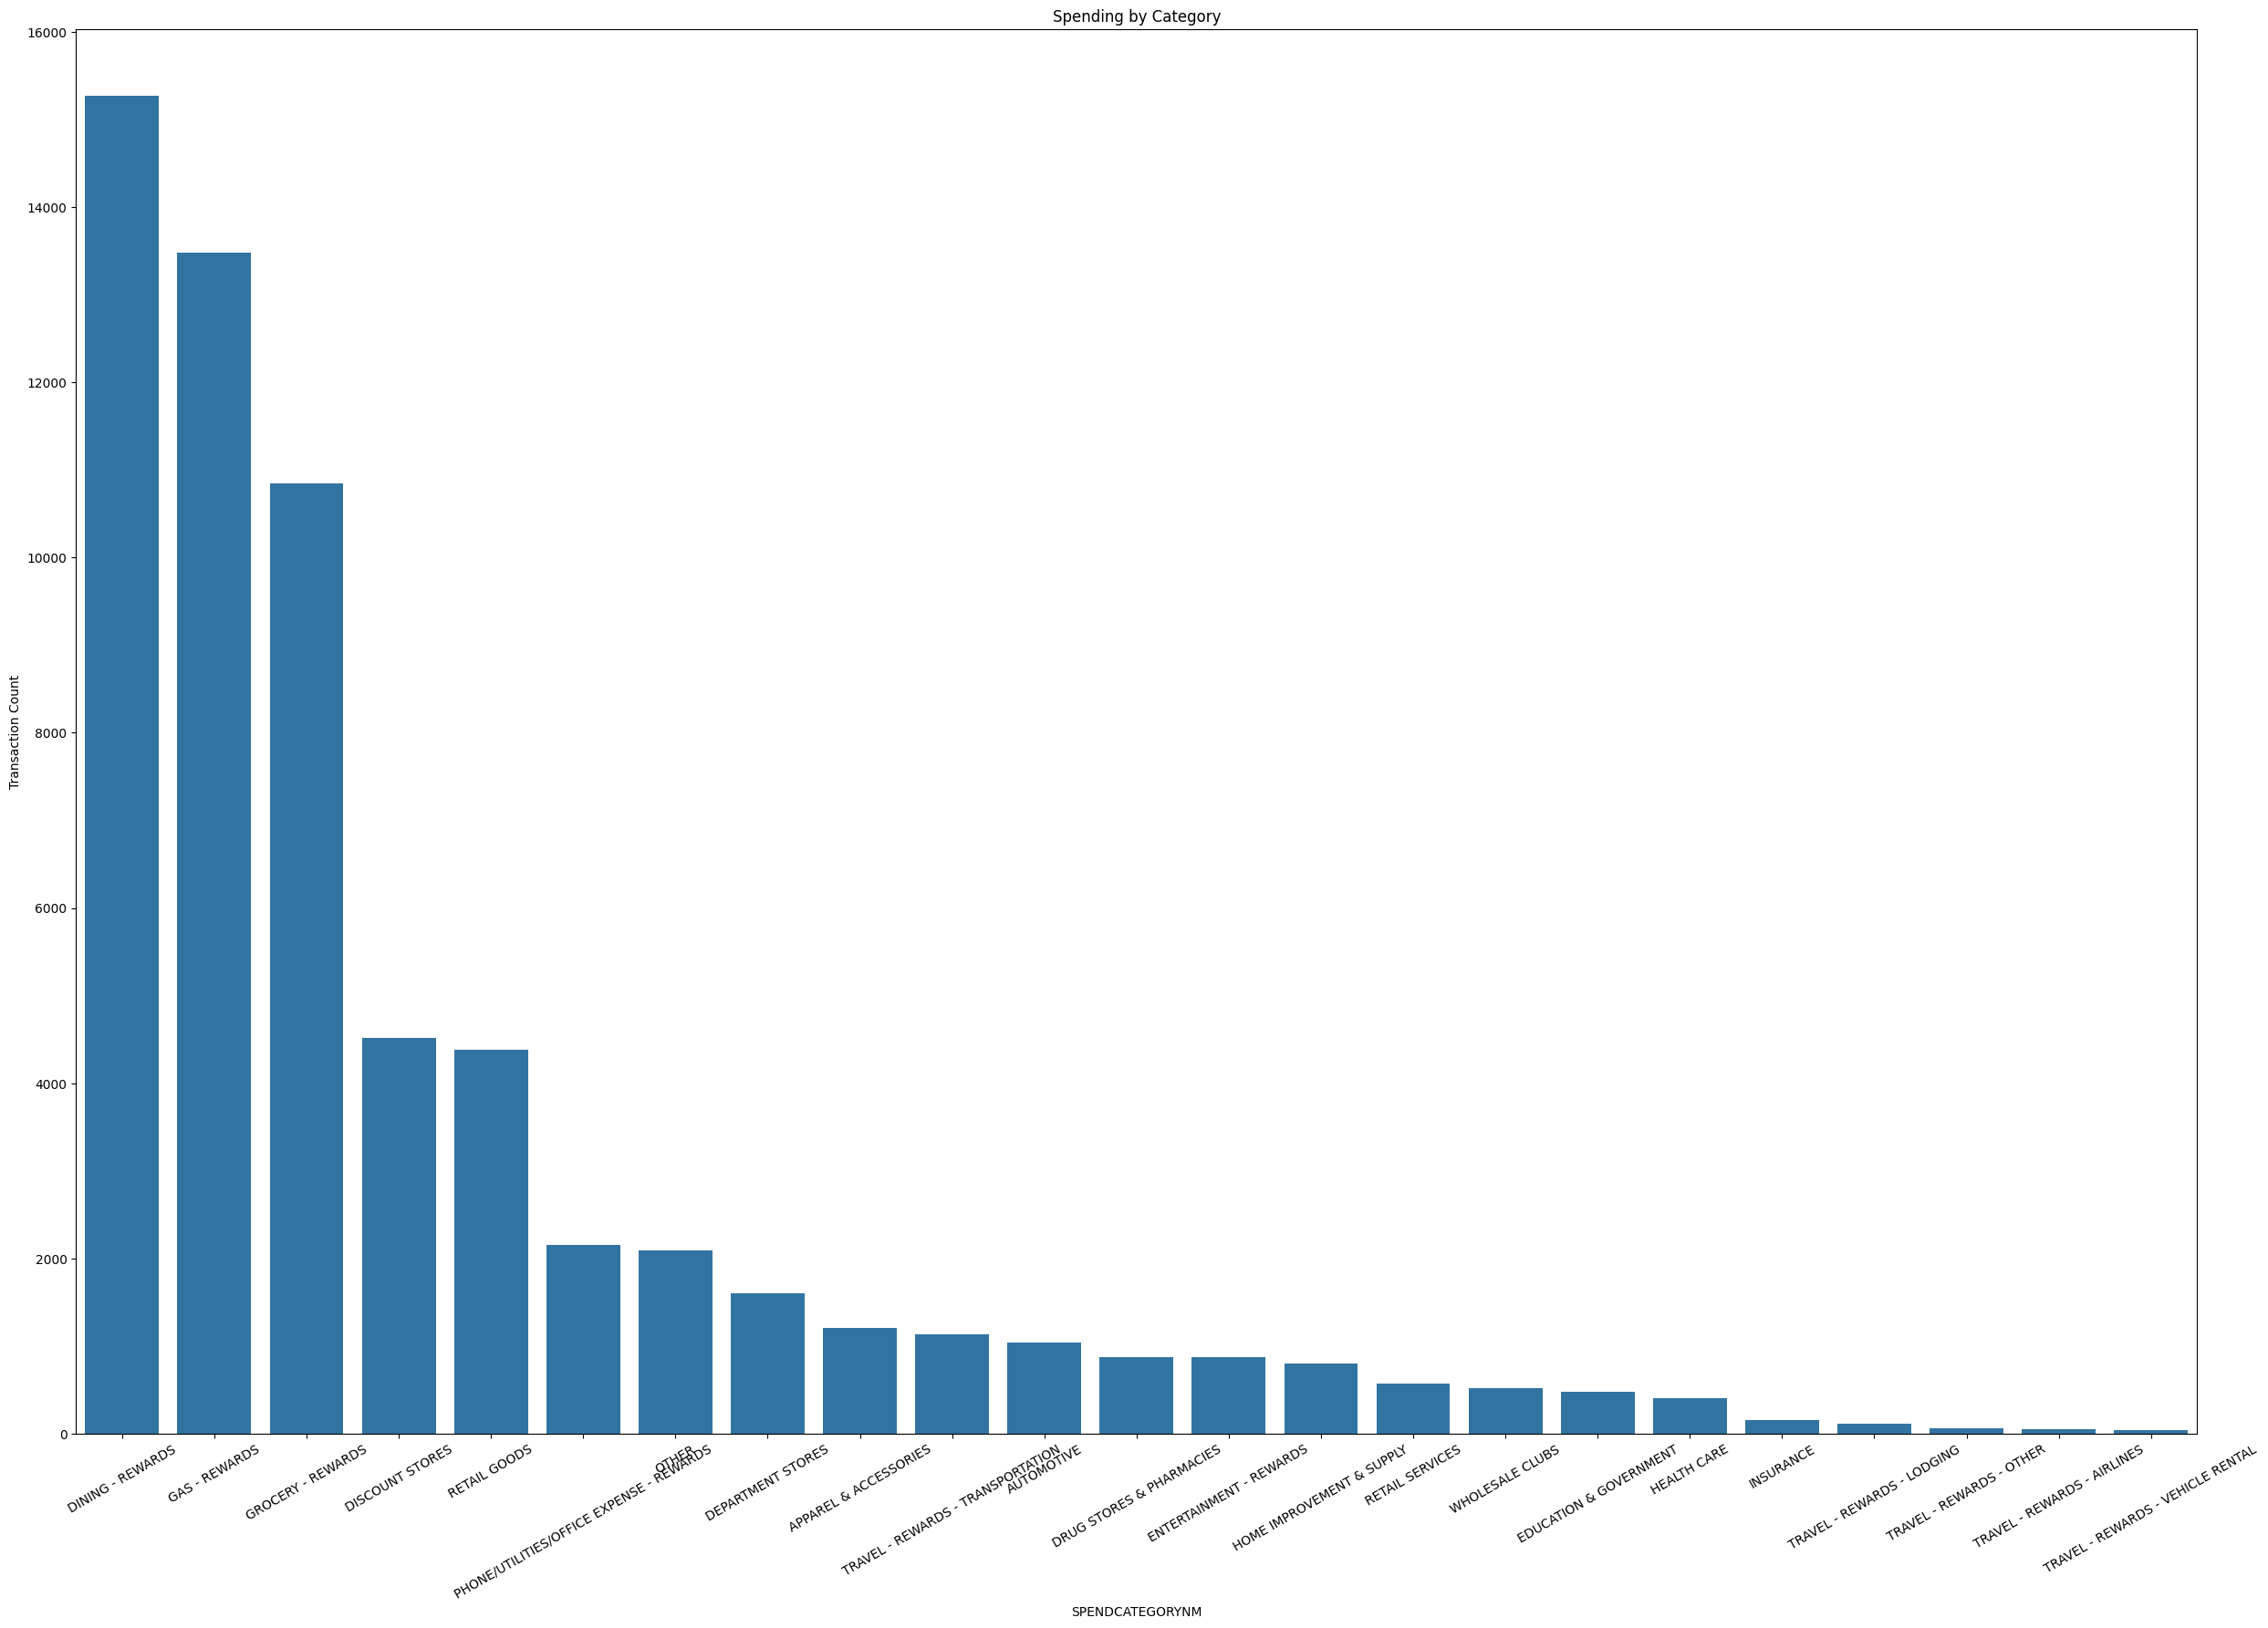

In [ ]:
plt.figure(figsize=(30,20))
sns.countplot(data=df, x='SPENDCATEGORYNM', order=df['SPENDCATEGORYNM'].value_counts().index)
plt.title("Spending by Category")
plt.ylabel("Transaction Count")
plt.xticks(rotation=30)
plt.show()

# Credit Health & Risk Indicators

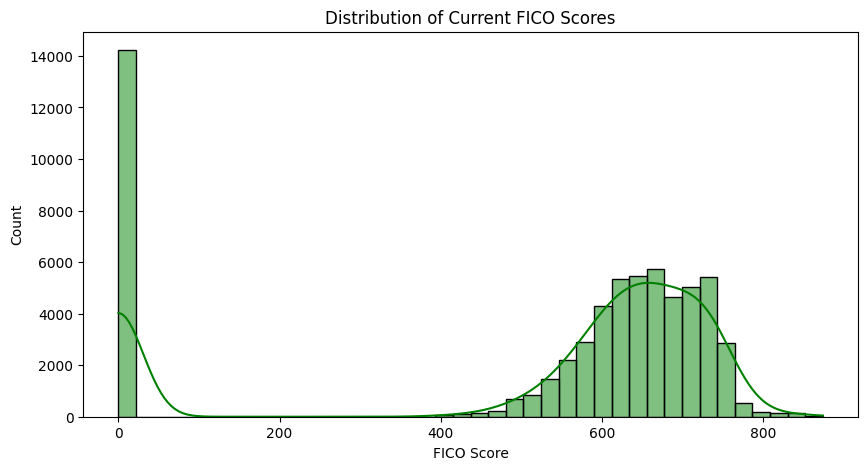

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['END_OF_MONTH_FICO'].dropna(), bins=40, kde=True, color="green")
plt.title("Distribution of Current FICO Scores")
plt.xlabel("FICO Score")
plt.show()

FNBO has a strong pool of customers in the 650–700 range (most are still in the middle credit-building stage), who could be candidates for credit line increases or graduation to unsecured cards.
The subprime group ( less than 600) requires careful monitoring and possibly targeted financial education to reduce risk.

Most transactions are small, clustered between 0 and 50, which is typical of secured card usage, customers often use them for controlled, everyday purchases (like gas, groceries, or small retail buys).The chart also shows some negative transaction amounts, which likely represent refunds, chargebacks, or reversals. FNBO might monitor this refund activity as part of fraud or risk management.

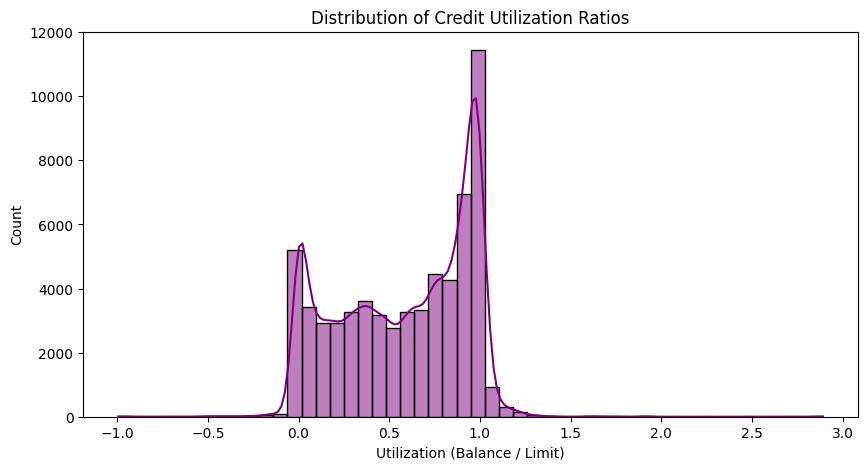

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['UTILIZATION'].dropna(), bins=50, kde=True, color="purple")
plt.title("Distribution of Credit Utilization Ratios")
plt.xlabel("Utilization (Balance / Limit)")
plt.show()

A large spike at 1.0 suggests many customers are maxing out their secured card limit each month. The fact that many customers sit near 100% utilization is a red flag, these are higher-risk users more likely to struggle with repayment.

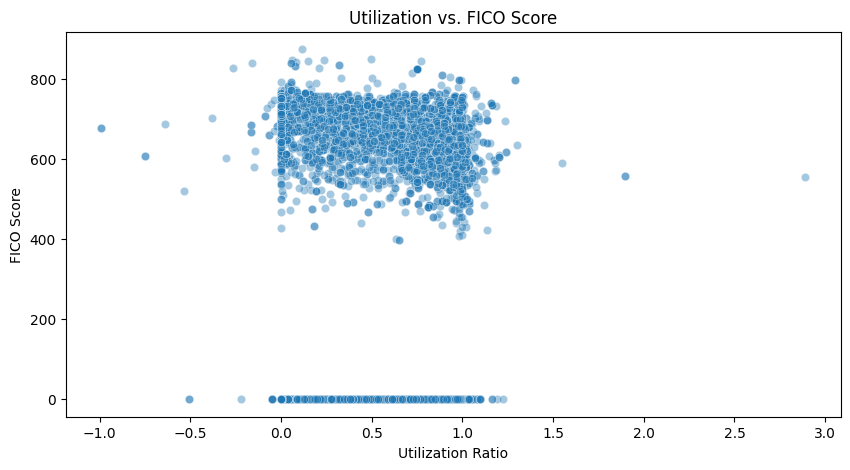

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df.sample(5000, random_state=42), x='UTILIZATION', y='END_OF_MONTH_FICO', alpha=0.4)
plt.title("Utilization vs. FICO Score")
plt.xlabel("Utilization Ratio")
plt.ylabel("FICO Score")
plt.show()

Most customers fall between 0–1 utilization. Customers with higher utilization tend to cluster around lower FICO scores while those with lower utilization tend to have stronger FICO scores.

# Credit Profile Evolution

In [ ]:
df['NEW_TO_CREDIT'] = df['FICO_AT_ACCT_OPEN'].apply(lambda x: 1 if x == 0 else 0)

In [ ]:
df['FICO_IMPROVEMENT'] = df['END_OF_MONTH_FICO'] - df['FICO_AT_ACCT_OPEN']

In [ ]:
df['FICO_IMPROVEMENT'] = df['FICO_IMPROVEMENT'].replace([float('inf'), -float('inf')], pd.NA)

In [ ]:
fico_gen = (
    df[df['FICO_IMPROVEMENT'].notna()]
    .groupby('GENERATION')['FICO_IMPROVEMENT']
    .mean()
    .sort_values(ascending=False)
)

/tmp/ipython-input-1945110174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fico_gen.index, y=fico_gen.values, palette="Blues_d")


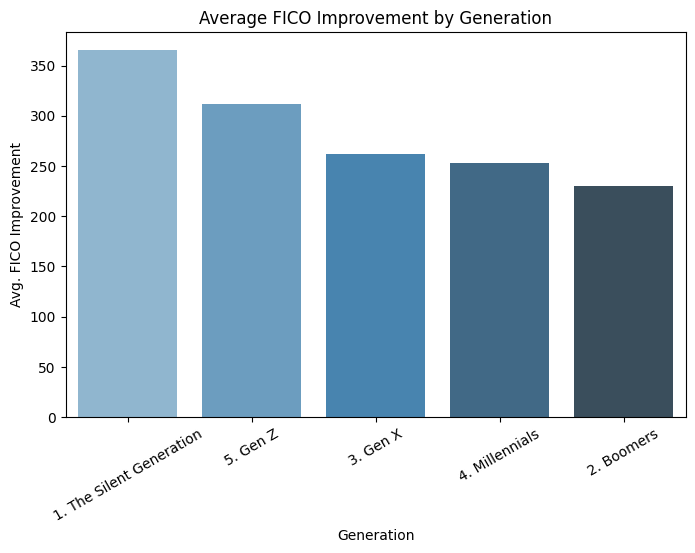

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=fico_gen.index, y=fico_gen.values, palette="Blues_d")
plt.title("Average FICO Improvement by Generation")
plt.ylabel("Avg. FICO Improvement")
plt.xlabel("Generation")
plt.xticks(rotation=30)
plt.show()

Silent Generation shows the highest average improvement (360 points) likely due to a small sample size of older customers who had low starting FICOs but quickly rebuilt their credit. Gen Z shows strong improvement (310 points), indicating that new-to-credit younger users are successfully using secured cards to build credit. Gen X and Millennials show moderate improvement (~250 points), suggesting they are maintaining or gradually improving existing credit.
Boomers improved the least (230 points), likely because most already had established credit histories and less room for score growth.

/tmp/ipython-input-1692383869.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fico_by_gen, x='GENERATION', y='END_OF_MONTH_FICO', palette="crest")


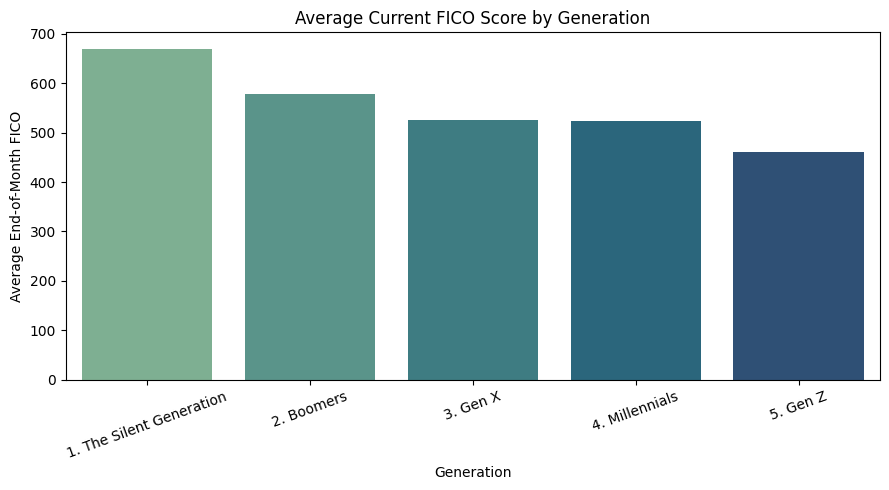

In [ ]:
fico_by_gen = (
    df.groupby('GENERATION')['END_OF_MONTH_FICO']
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

plt.figure(figsize=(9,5))
sns.barplot(data=fico_by_gen, x='GENERATION', y='END_OF_MONTH_FICO', palette="crest")
plt.title("Average Current FICO Score by Generation")
plt.xlabel("Generation")
plt.ylabel("Average End-of-Month FICO")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


Silent Generation has the highest average FICO (660–680) , they’re older, more experienced borrowers with long-standing credit histories and strong repayment behavior. Boomers follow next (580–600), maintaining fair-to-good scores.
Gen X and Millennials are in the 520–540 range, showing developing but not yet strong credit positions.Gen Z has the lowest average FICO (470–500), which is expected since they are new-to-credit and just starting to build their financial reputation.

In [ ]:
def categorize_improvement(x):
    if pd.isna(x):
        return "Missing"
    elif x > 10:
        return "Improved"
    elif x < -10:
        return "Declined"
    else:
        return "No Change"

In [ ]:
df['IMPROVEMENT_STATUS'] = df['FICO_IMPROVEMENT'].apply(categorize_improvement)

In [ ]:
improvement_by_gen = (
    df[df['IMPROVEMENT_STATUS'] != "Missing"]
    .groupby(['GENERATION', 'IMPROVEMENT_STATUS'])
    .size()
    .reset_index(name='COUNT')
)

In [ ]:

improvement_by_gen['PCT'] = improvement_by_gen.groupby('GENERATION')['COUNT'].transform(lambda x: 100 * x / x.sum())

In [ ]:
improvement_pivot = improvement_by_gen.pivot(index='GENERATION', columns='IMPROVEMENT_STATUS', values='PCT').fillna(0)

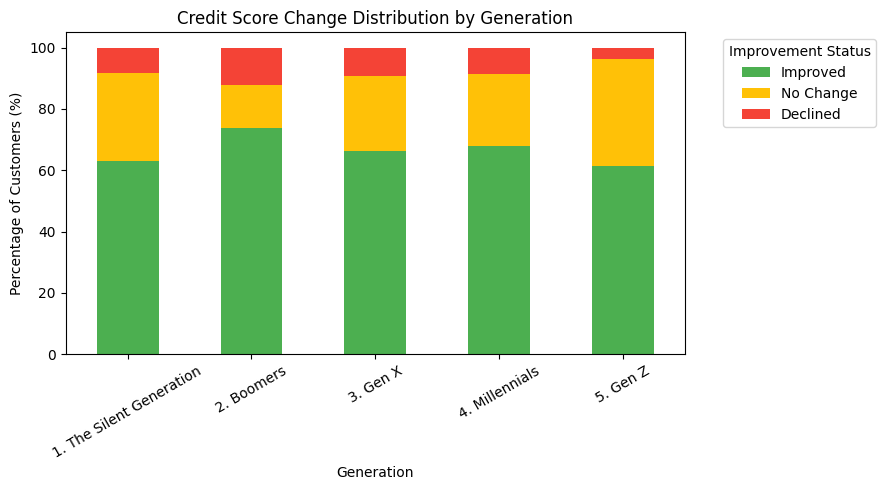

In [ ]:
improvement_pivot = improvement_pivot[['Improved', 'No Change', 'Declined']]  # consistent order

ax = improvement_pivot.plot(
    kind='bar',
    stacked=True,
    color=['#4CAF50', '#FFC107', '#F44336'],
    figsize=(9,5)
)

ax.set_title("Credit Score Change Distribution by Generation")
ax.set_ylabel("Percentage of Customers (%)")
ax.set_xlabel("Generation")
ax.legend(title="Improvement Status", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


Across all generations, a majority (60–75%) of customers improved their FICO scores.Boomers and Gen X show the highest proportion of improved customers (70–75%), indicating strong financial discipline and repayment consistency.
Gen Z has a slightly lower improvement rate (60%), likely due to being new-to-credit and still establishing repayment habits.
Only a small fraction (less than 10%) in each group experienced score declines, signaling generally healthy portfolio performance.

In [ ]:
total_improved = (df['IMPROVEMENT_STATUS'] == "Improved").mean()
total_declined = (df['IMPROVEMENT_STATUS'] == "Declined").mean()
new_to_credit_improved = df[df['NEW_TO_CREDIT']==1]['IMPROVEMENT_STATUS'].value_counts(normalize=True).get('Improved', 0)

print("\n=== CREDIT IMPROVEMENT SUMMARY ===")
print(f"Overall Improvement Rate: {total_improved:.1%}")
print(f"Overall Decline Rate: {total_declined:.1%}")
print(f"Improvement Rate among New-to-Credit Customers: {new_to_credit_improved:.1%}")


=== CREDIT IMPROVEMENT SUMMARY ===
Overall Improvement Rate: 65.6%
Overall Decline Rate: 7.1%
Improvement Rate among New-to-Credit Customers: 63.8%


In [ ]:
def utilization_band(x):
    if x < 0.3:
        return "<30% (Low)"
    elif x < 0.8:
        return "30–80% (Moderate)"
    else:
        return ">80% (High)"


In [ ]:
df['UTIL_BAND'] = df['UTILIZATION'].apply(utilization_band)

In [ ]:
fico_util = (
    df[df['FICO_IMPROVEMENT'].notna()]
    .groupby('UTIL_BAND')['FICO_IMPROVEMENT']
    .mean()
    .reindex(["<30% (Low)", "30–80% (Moderate)", ">80% (High)"])
)

/tmp/ipython-input-368726826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fico_util.index, y=fico_util.values, palette="Purples_d")


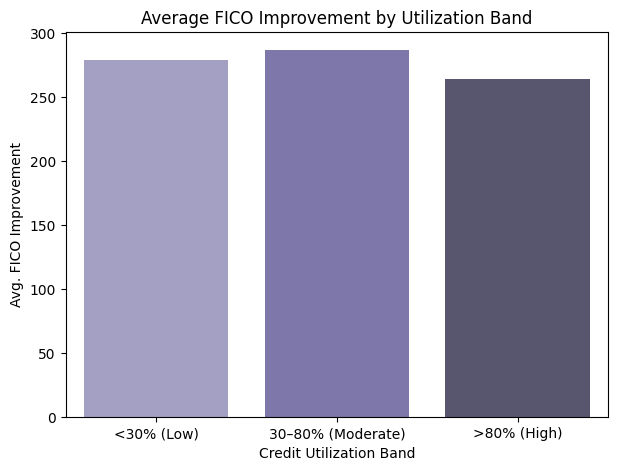

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x=fico_util.index, y=fico_util.values, palette="Purples_d")
plt.title("Average FICO Improvement by Utilization Band")
plt.ylabel("Avg. FICO Improvement")
plt.xlabel("Credit Utilization Band")
plt.show()

Customers with moderate utilization (30–80%) show the highest average improvement (290 points), this range signals responsible but active usage, which is viewed positively by credit scoring models. Low utilizers (less than 30%) also improved significantly (275 points), suggesting that maintaining low balances helps build credit health. High utilizers (greater than 80%) improved the least (~265 points), it indicates that maxing out credit limits can slow credit improvement and potentially increase perceived risk.

In [ ]:
df['MONTH'] = df['TRANSACTIONDT'].dt.to_period('M')

In [ ]:
monthly_fico = (
    df.groupby('MONTH')['END_OF_MONTH_FICO']
      .mean()
      .reset_index()
)
monthly_fico['MONTH'] = monthly_fico['MONTH'].astype(str)
monthly_fico['MONTH'] = pd.to_datetime(monthly_fico['MONTH'])

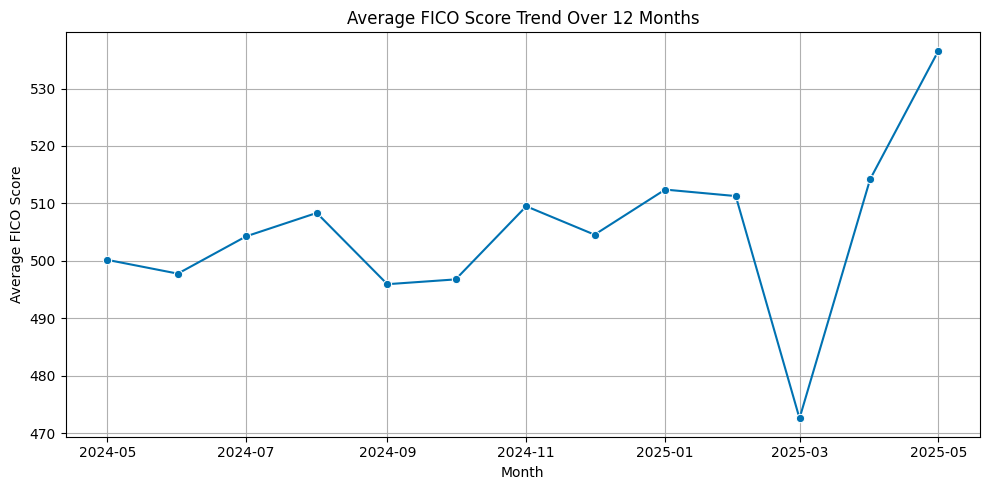

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_fico, x='MONTH', y='END_OF_MONTH_FICO', marker='o', color="#0072B2")

plt.title("Average FICO Score Trend Over 12 Months")
plt.xlabel("Month")
plt.ylabel("Average FICO Score")
plt.grid(True)
plt.tight_layout()
plt.show()

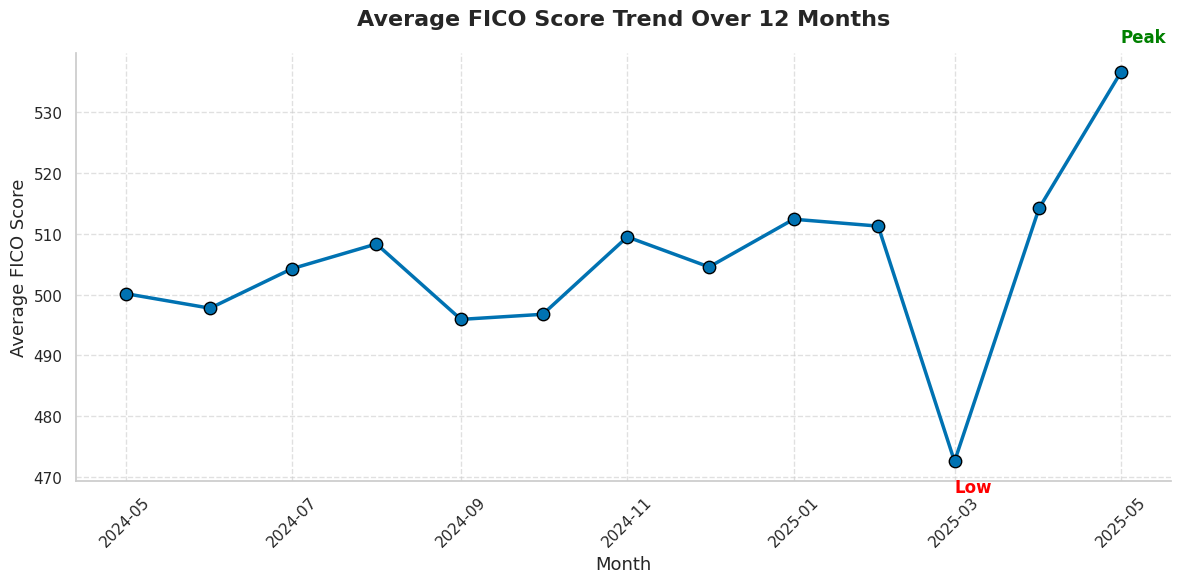

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply a modern Seaborn theme
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=monthly_fico,
    x='MONTH',
    y='END_OF_MONTH_FICO',
    marker='o',
    color="#0072B2",
    linewidth=2.5
)

# Add markers and emphasize them
plt.scatter(monthly_fico['MONTH'], monthly_fico['END_OF_MONTH_FICO'],
            s=80, color="#0072B2", edgecolors='black', zorder=3)

# Titles and labels
plt.title("Average FICO Score Trend Over 12 Months", fontsize=16, weight='bold', pad=20)
plt.xlabel("Month", fontsize=13)
plt.ylabel("Average FICO Score", fontsize=13)

# Rotate x-axis labels for better readability if months are long
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

# Add background grid with subtle opacity
plt.grid(True, linestyle='--', alpha=0.6)

# Remove top and right spines for a clean look
sns.despine()

# Annotate the highest and lowest points
max_idx = monthly_fico['END_OF_MONTH_FICO'].idxmax()
min_idx = monthly_fico['END_OF_MONTH_FICO'].idxmin()
plt.text(monthly_fico['MONTH'][max_idx], monthly_fico['END_OF_MONTH_FICO'][max_idx] + 5,
         "Peak", color='green', weight='bold')
plt.text(monthly_fico['MONTH'][min_idx], monthly_fico['END_OF_MONTH_FICO'][min_idx] - 5,
         "Low", color='red', weight='bold')

plt.tight_layout()
plt.show()


The average FICO started near 500 in mid-2024, showing that most customers entered with limited or poor credit history. The scores gradually improved over the next several months, reaching around 510–515 by early 2025 — indicating steady progress in credit-building behavior. A dip around March 2025 could reflect seasonal effects. The sharp rebound by May 2025, climbing above 530, suggests portfolio recovery and continued improvement in credit management over time.

In [ ]:
print("\n=== CREDIT PROFILE EVOLUTION SUMMARY ===")
print(f"Total Customers: {df['ACCOUNT'].nunique()}")
print(f"New-to-Credit Customers: {df['NEW_TO_CREDIT'].sum()} ({df['NEW_TO_CREDIT'].mean():.1%})")
print(f"Average FICO Improvement (all customers): {df['FICO_IMPROVEMENT'].mean():.2f}")
print(f"Average FICO Improvement (new-to-credit only): {df[df['NEW_TO_CREDIT']==1]['FICO_IMPROVEMENT'].mean():.2f}")



=== CREDIT PROFILE EVOLUTION SUMMARY ===
Total Customers: 1072
New-to-Credit Customers: 38406 (61.2%)
Average FICO Improvement (all customers): 276.03
Average FICO Improvement (new-to-credit only): 430.57


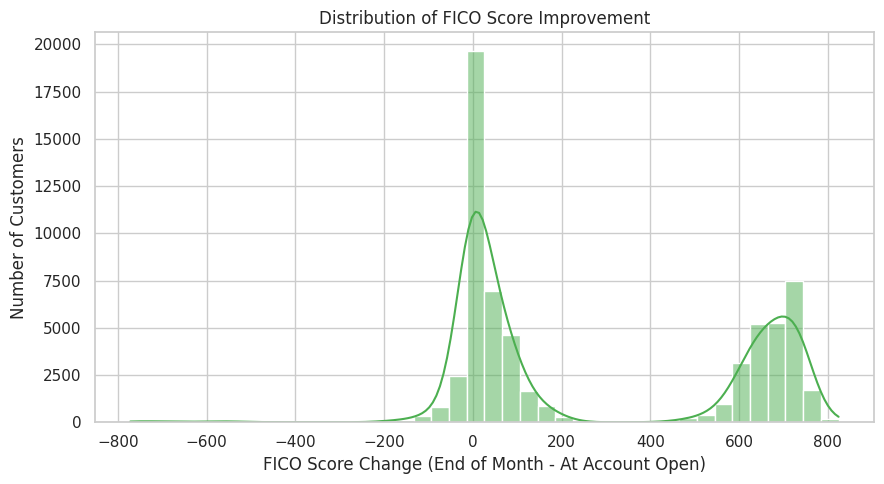

In [ ]:
plt.figure(figsize=(9,5))
sns.histplot(df['FICO_IMPROVEMENT'].dropna(), bins=40, kde=True, color="#4CAF50")
plt.title("Distribution of FICO Score Improvement")
plt.xlabel("FICO Score Change (End of Month - At Account Open)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

The graph has two visible peaks:
A smaller one near 0, showing customers whose scores have changed little (stable users). A larger peak around +600–800, showing a significant group of customers with major credit improvement.
Very few customers experienced large declines (the left tail below -200).


In [ ]:
fico_by_group = (
    df.groupby(['MONTH', 'NEW_TO_CREDIT'])['END_OF_MONTH_FICO']
      .mean()
      .reset_index()
)

fico_by_group['MONTH'] = fico_by_group['MONTH'].astype(str)
fico_by_group['MONTH'] = pd.to_datetime(fico_by_group['MONTH'], format='%Y-%m', errors='coerce')


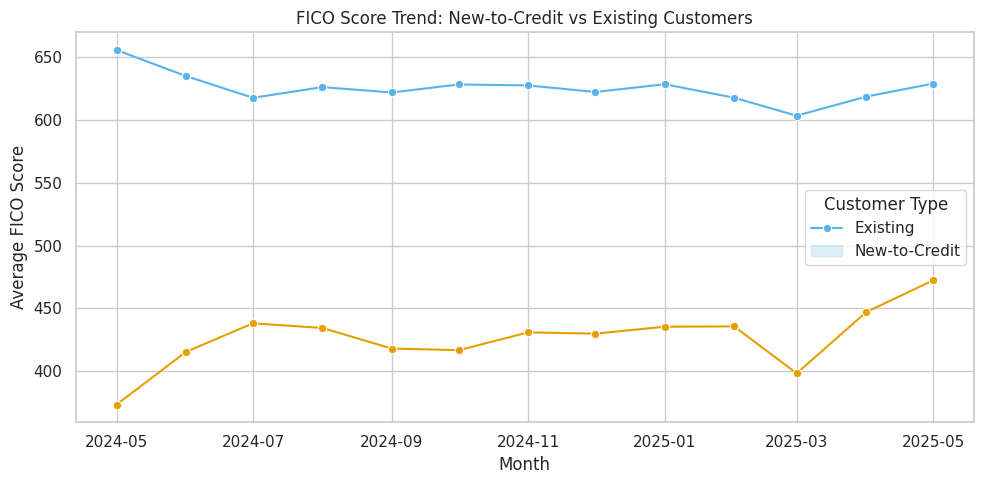

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data=fico_by_group,
    x='MONTH', y='END_OF_MONTH_FICO',
    hue='NEW_TO_CREDIT',
    palette={1: "#E69F00", 0: "#56B4E9"},
    marker='o'
)

plt.title("FICO Score Trend: New-to-Credit vs Existing Customers")
plt.xlabel("Month")
plt.ylabel("Average FICO Score")
plt.legend(title="Customer Type", labels=["Existing", "New-to-Credit"])
plt.grid(True)
plt.tight_layout()
plt.show()


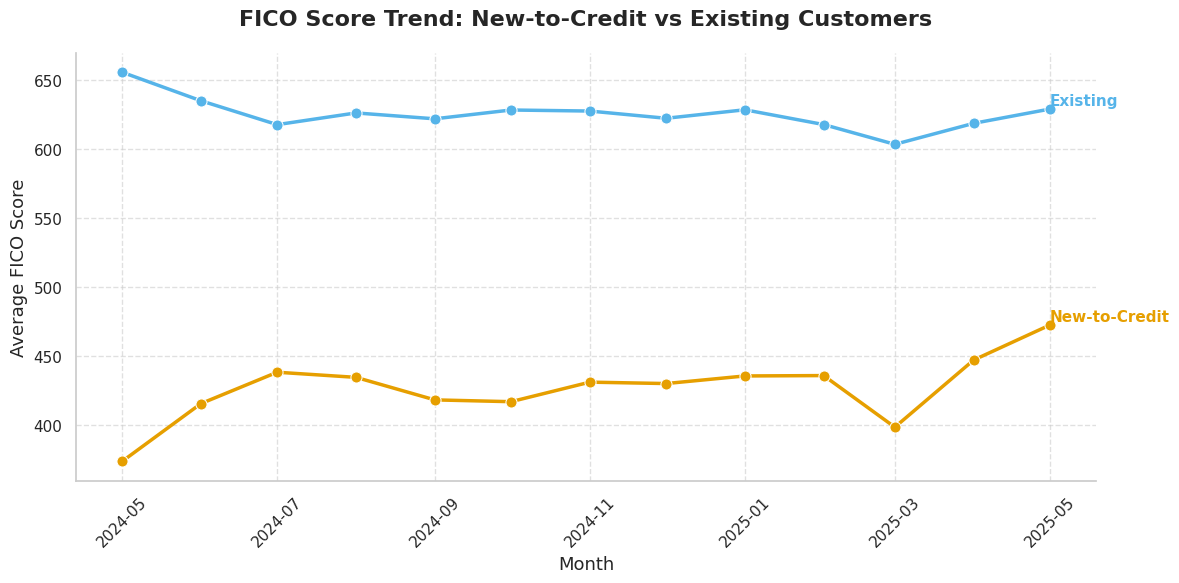

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Modern style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=fico_by_group,
    x='MONTH',
    y='END_OF_MONTH_FICO',
    hue='NEW_TO_CREDIT',
    palette={1: "#E69F00", 0: "#56B4E9"},
    marker='o',
    linewidth=2.5,
    markersize=8,
    legend=False
)

# Titles and labels
plt.title("FICO Score Trend: New-to-Credit vs Existing Customers", fontsize=16, weight='bold', pad=20)
plt.xlabel("Month", fontsize=13)
plt.ylabel("Average FICO Score", fontsize=13)

# Clean ticks and grid
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()

# Annotate the last data points directly instead of showing legend
for key, color, label in zip([0, 1], ["#56B4E9", "#E69F00"], ["Existing", "New-to-Credit"]):
    subset = fico_by_group[fico_by_group["NEW_TO_CREDIT"] == key]
    last_row = subset.iloc[-1]
    plt.text(
        last_row["MONTH"],
        last_row["END_OF_MONTH_FICO"] + 3,
        label,
        color=color,
        fontsize=11,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


Existing customers maintain strong scores throughout the year (around 620–650), showing financial stability and consistent credit management. New-to-credit customers start much lower (370–400) but show steady improvement, crossing 460 by May 2025, which reflects successful credit building. Both groups show a small dip around March 2025, possibly due to post-holiday high utilization or delayed payments but both recover quickly.

# Product Engagement Over Time

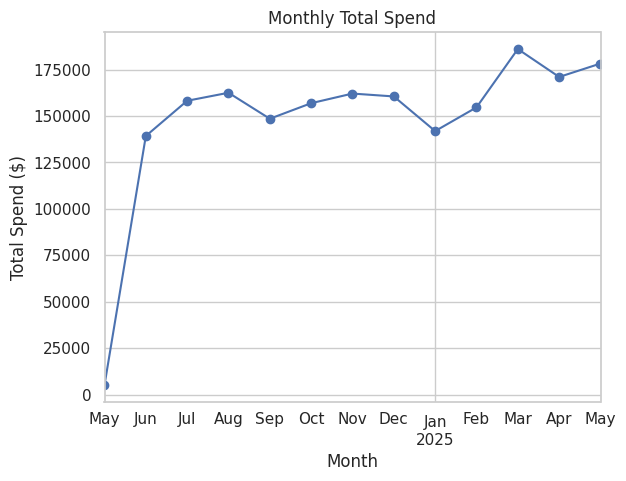

In [ ]:
monthly_spend = df.groupby('TRANSACTION_MONTH')['TRANSACTIONAMT'].sum()
monthly_spend.plot(marker='o')
plt.title("Monthly Total Spend"); plt.xlabel("Month"); plt.ylabel("Total Spend ($)")
plt.show()

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd

# # Aggregate again (if not already)
# monthly_spend = df.groupby('TRANSACTION_MONTH', as_index=False)['TRANSACTIONAMT'].sum()

# # Optional: ensure chronological order if your months are strings like '2024-05'
# monthly_spend = monthly_spend.sort_values('TRANSACTION_MONTH')

# # Set style and palette
# sns.set_theme(style="whitegrid")
# sns.set_palette("crest")

# plt.figure(figsize=(12, 6))
# ax = sns.lineplot(
#     data=monthly_spend,
#     x='TRANSACTION_MONTH',
#     y='TRANSACTIONAMT',
#     marker='o',
#     linewidth=3,
# )

# # Add subtle background and nicer fonts
# ax.set_facecolor("#f9f9f9")
# plt.title("📈 Monthly Total Spend", fontsize=18, weight='bold', pad=15)
# plt.xlabel("Month", fontsize=13, labelpad=10)
# plt.ylabel("Total Spend ($)", fontsize=13, labelpad=10)
# plt.xticks(rotation=45, fontsize=11)
# plt.yticks(fontsize=11)

# # Add data labels
# for i, point in monthly_spend.iterrows():
#     plt.text(point['TRANSACTION_MONTH'], point['TRANSACTIONAMT'] + 2000,
#              f"${int(point['TRANSACTIONAMT']):,}", ha='center', fontsize=10, color="#444")

# sns.despine()
# plt.tight_layout()
# plt.show()


There is a sharp ramp-up in spend from May to June. From June onward, monthly spend fluctuates but generally stays in the 140K–160K range, showing consistent engagement. A slight decline is visible in January 2025 (around 135K), which may reflect seasonal post-holiday reductions. The highest spend occurs in March 2025 (174K)

# Additional Behavioral & Portfolio Insights

In [ ]:

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


In [ ]:
def fico_category(score):
    if pd.isna(score): return "Unknown"
    elif score < 580: return "Poor"
    elif score < 670: return "Fair"
    elif score < 740: return "Good"
    elif score < 800: return "Very Good"
    else: return "Excellent"

In [ ]:
df['FICO_GROUP'] = df['END_OF_MONTH_FICO'].apply(fico_category)

In [ ]:
fico_group_counts = df.drop_duplicates('ACCOUNT')['FICO_GROUP'].value_counts(normalize=True)*100
fico_group_counts = fico_group_counts.round(1)


## Credit Score Categories

/tmp/ipython-input-1933715033.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fico_group_counts.index, y=fico_group_counts.values, palette="viridis")


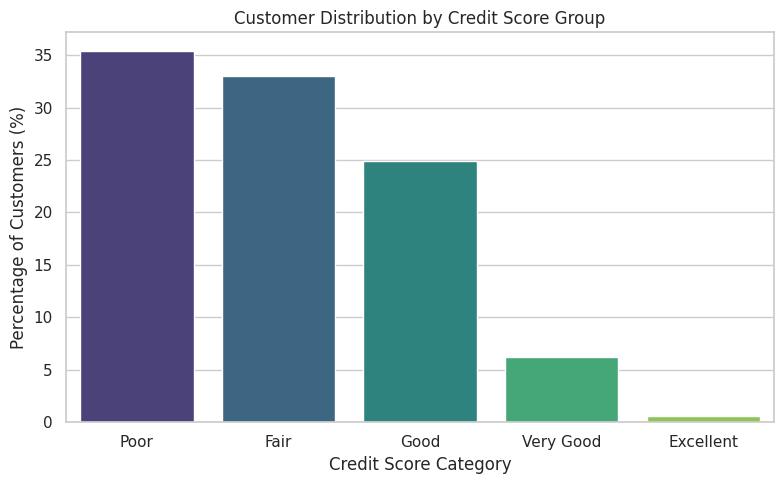

Credit Score Group Share (%):
 FICO_GROUP
Poor         35.4
Fair         33.0
Good         24.9
Very Good     6.2
Excellent     0.6
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=fico_group_counts.index, y=fico_group_counts.values, palette="viridis")
plt.title("Customer Distribution by Credit Score Group")
plt.ylabel("Percentage of Customers (%)")
plt.xlabel("Credit Score Category")
plt.tight_layout()
plt.show()

print("Credit Score Group Share (%):\n", fico_group_counts)

/tmp/ipython-input-1193804154.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


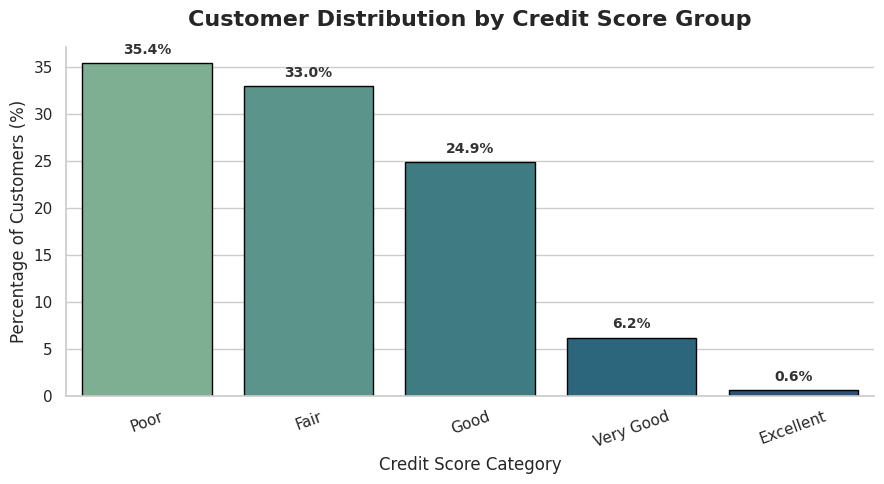

Credit Score Group Share (%):
 FICO_GROUP
Poor         35.4
Fair         33.0
Good         24.9
Very Good     6.2
Excellent     0.6
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# make sure fico_group_counts is a pandas Series or DataFrame
plt.figure(figsize=(9,5))
sns.set_theme(style="whitegrid", palette="viridis")

# draw bar chart
ax = sns.barplot(
    x=fico_group_counts.index,
    y=fico_group_counts.values,
    palette="crest",
    edgecolor="black"
)

# title & labels
plt.title("Customer Distribution by Credit Score Group", fontsize=16, weight="bold", pad=15)
plt.ylabel("Percentage of Customers (%)", fontsize=12)
plt.xlabel("Credit Score Category", fontsize=12)
plt.xticks(rotation=20, fontsize=11)
plt.yticks(fontsize=11)

# add value labels on top of bars
for i, v in enumerate(fico_group_counts.values):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10, fontweight='bold', color="#333")

sns.despine()
plt.tight_layout()
plt.show()

print("Credit Score Group Share (%):\n", fico_group_counts)


Majority of customers fall in the “Poor” (35%) and “Fair” (33%) credit score categories, confirming that the FNBO secured card portfolio largely serves its intended demographic: individuals with limited or challenged credit histories.Around 25% of customers are in the “Good” category, showing that many have already begun rebuilding or strengthening their credit. Only a small portion (6%) are “Very Good” and 1% “Excellent”, indicating that most cardholders are still in the credit-building phase and have room for improvement.

## Transaction & Market Share by Generation

/tmp/ipython-input-3935333730.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=txn_gen, x='GENERATION', y='TRANSACTIONAMT', palette="magma")


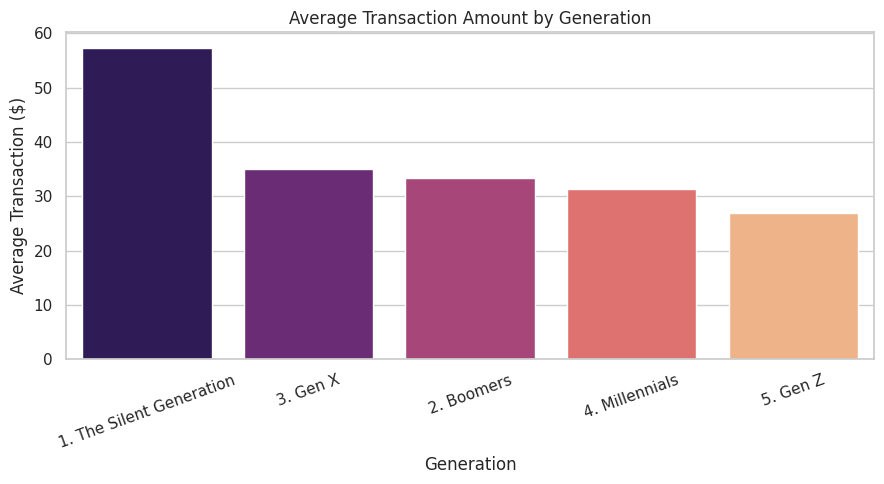

In [ ]:
txn_gen = (
    df.groupby('GENERATION')['TRANSACTIONAMT']
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

plt.figure(figsize=(9,5))
sns.barplot(data=txn_gen, x='GENERATION', y='TRANSACTIONAMT', palette="magma")
plt.title("Average Transaction Amount by Generation")
plt.xlabel("Generation")
plt.ylabel("Average Transaction ($)")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

The Silent Generation records the highest average transaction amount ($57) likely reflecting higher financial stability, larger purchases, or fewer but more valuable transactions. Gen X and Boomers follow with moderate average spends (33–35), showing balanced usage patterns. Millennials and Gen Z have the lowest average transaction amounts (25–30), consistent with their smaller credit limits and new-to-credit behavior. The trend indicates that younger generations tend to use secured cards for low-ticket, everyday purchases, while older generations may use them more selectively or for larger expenses.

In [ ]:
gen_share = df.drop_duplicates('ACCOUNT')['GENERATION'].value_counts(normalize=True)*100

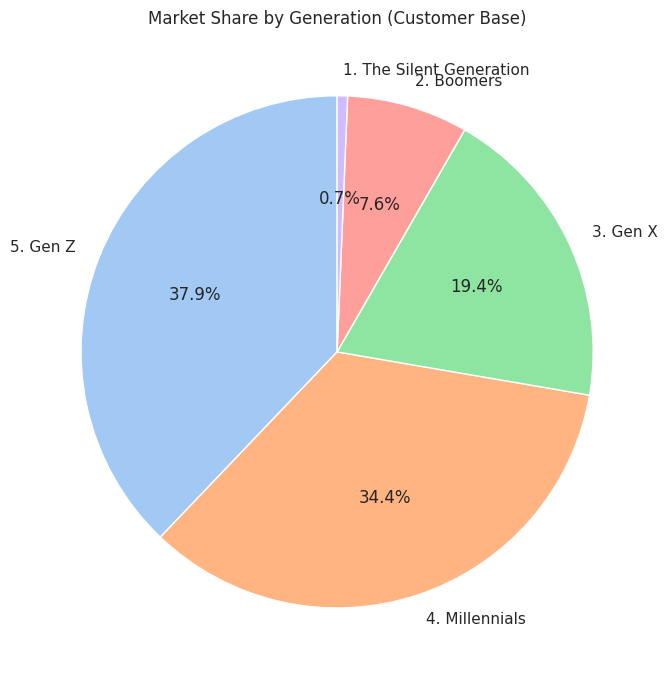

Market Share by Generation (%):
 GENERATION
5. Gen Z                    37.9
4. Millennials              34.4
3. Gen X                    19.4
2. Boomers                   7.6
1. The Silent Generation     0.7
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(7,7))
plt.pie(
    gen_share.values,
    labels=gen_share.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")
)
plt.title("Market Share by Generation (Customer Base)")
plt.tight_layout()
plt.show()

print("Market Share by Generation (%):\n", gen_share.round(1))

Gen Z (37.9%) and Millennials (34.4%) together make up over 70% of the total customer base, confirming that FNBO’s secured credit card is highly concentrated among younger, new-to-credit customers. Gen X (19.4%) represents a smaller, more mature segment—likely users who are rebuilding credit rather than starting fresh. Boomers (7.6%) and the Silent Generation (0.7%) form a very small portion, reflecting limited adoption among older demographics who already possess established credit histories.

## Geographic Distribution

/tmp/ipython-input-1834870598.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geo.index, y=geo.values, palette="coolwarm")


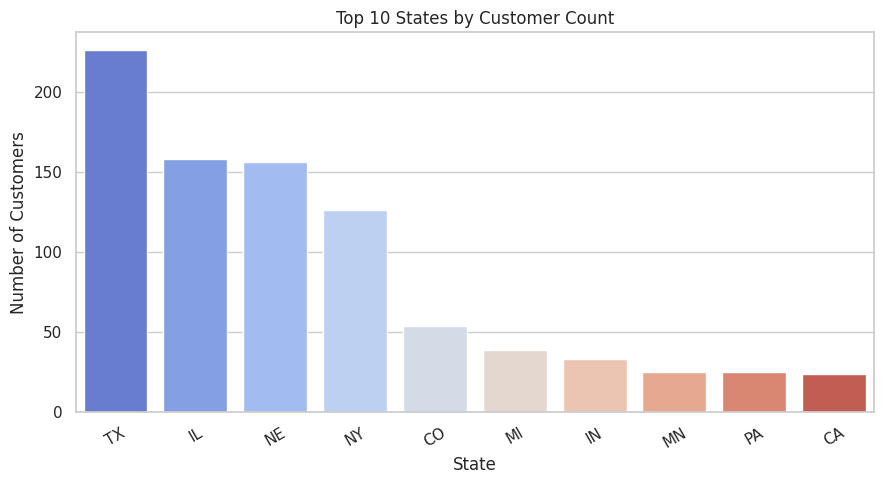

In [ ]:
if 'STATE' in df.columns:
    geo = df.drop_duplicates('ACCOUNT')['STATE'].value_counts().head(10)
    plt.figure(figsize=(9,5))
    sns.barplot(x=geo.index, y=geo.values, palette="coolwarm")
    plt.title("Top 10 States by Customer Count")
    plt.ylabel("Number of Customers")
    plt.xlabel("State")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
elif 'CITY' in df.columns:
    geo = df.drop_duplicates('ACCOUNT')['CITY'].value_counts().head(10)
    plt.figure(figsize=(9,5))
    sns.barplot(x=geo.index, y=geo.values, palette="coolwarm")
    plt.title("Top 10 Cities by Customer Count")
    plt.ylabel("Number of Customers")
    plt.xlabel("City")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
else:
    print("No geographic field found (STATE/CITY). Skipping geo plot.")

Texas (TX) stands out as the largest customer base, with over 220 secured cardholders, suggesting strong brand presence or marketing success in that region. Illinois (IL) and Nebraska (NE) follow closely. New York (NY) also has a significant share, indicating penetration in larger urban markets. States like Colorado (CO), Michigan (MI), Indiana (IN), Minnesota (MN), Pennsylvania (PA), and California (CA) form a secondary cluster with smaller but still notable customer presence.

## Balance vs FICO

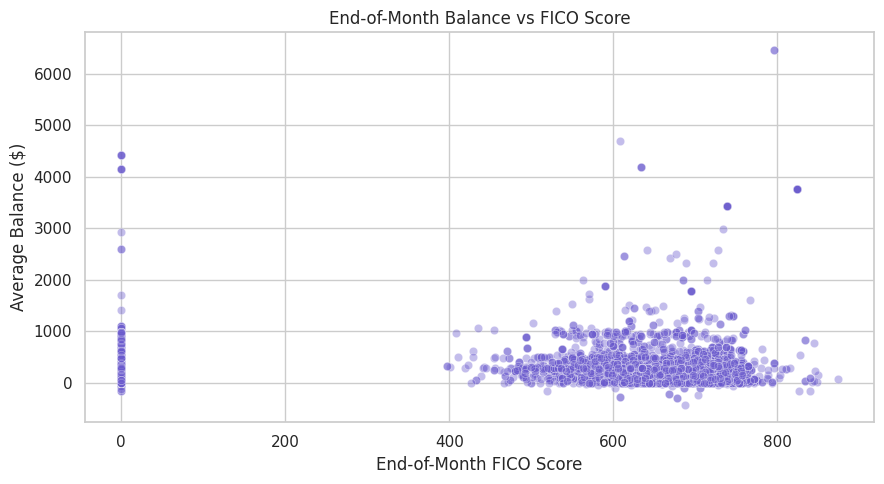

In [ ]:
plt.figure(figsize=(9,5))
sns.scatterplot(
    data=df.sample(min(5000, len(df)), random_state=42),
    x='END_OF_MONTH_FICO', y='END_OF_MTH_BALANCE', alpha=0.4, color="#6A5ACD"
)
plt.title("End-of-Month Balance vs FICO Score")
plt.xlabel("End-of-Month FICO Score")
plt.ylabel("Average Balance ($)")
plt.tight_layout()
plt.show()

Most customers cluster between FICO 500–700 and balances below 1,000.
This aligns with secured card users, they typically maintain low credit limits and moderate balances. A few outliers with higher balances (greater than 3,000) appear among customers with FICO scores above 650, suggesting responsible, higher-limit users. There’s a clear positive relationship: as FICO scores rise, balances tend to stabilize, not spike, indicating controlled credit behavior among those with better credit health. The dense cluster near FICO = 0 likely represents missing or zero-initial scores, customers with no prior credit history (new-to-credit).

In [ ]:
df.head()

,ACCOUNT,GENERATION,END_OF_MONTH_FICO,FICO_AT_ACCT_OPEN,VINTAGE_YYYYMM,STATE,MTH_INCOME,CREDIT_LMT,TRANSACTIONDT,TRANSACTIONAMT,...,SPENDCATEGORYNM,END_OF_MTH_BALANCE,UTILIZATION,TRANSACTION_MONTH,NEW_TO_CREDIT,FICO_IMPROVEMENT,IMPROVEMENT_STATUS,UTIL_BAND,MONTH,FICO_GROUP
0,784,3. Gen X,706,0,202410,FL,0,500,2024-12-31,30.00,...,OTHER,480.92,0.961840,2024-12,1,706,Improved,>80% (High),2024-12,Good
1,92,2. Boomers,621,638,202005,TX,2390,300,2025-02-03,14.60,...,RETAIL GOODS,278.03,0.926767,2025-02,0,-17,Declined,>80% (High),2025-02,Fair
2,494,2. Boomers,573,616,202404,TX,0,300,2025-04-25,16.24,...,RETAIL GOODS,0.00,0.000000,2025-04,0,-43,Declined,<30% (Low),2025-04,Poor
3,498,3. Gen X,667,0,202404,CO,0,300,2024-10-20,40.00,...,GAS - REWARDS,191.13,0.637100,2024-10,1,667,Improved,30–80% (Moderate),2024-10,Fair
4,498,3. Gen X,650,0,202404,CO,0,300,2024-11-03,37.73,...,GAS - REWARDS,177.09,0.590300,2024-11,1,650,Improved,30–80% (Moderate),2024-11,Fair


predict whether each secured card customer’s credit score will improve, stay the same, or decline.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
total_accounts = df['ACCOUNT'].nunique()
total_accounts

1072

In [ ]:
zero_income_accounts = df.loc[df['MTH_INCOME'] == 0, 'ACCOUNT'].nunique()
zero_income_accounts

853

In [ ]:
percentage_zero = (zero_income_accounts / total_accounts) * 100

print(f"Total unique accounts: {total_accounts}")
print(f"Accounts with MTH_INCOME = 0: {zero_income_accounts}")
print(f"Percentage of zero-income accounts: {percentage_zero:.2f}%")

Total unique accounts: 1072
Accounts with MTH_INCOME = 0: 853
Percentage of zero-income accounts: 79.57%


In [ ]:

# # Handle missing or zero incomes
# df['MTH_INCOME'].replace(0, np.nan, inplace=True)
# df['MTH_INCOME'].fillna(df['MTH_INCOME'].median(), inplace=True)

# # Encode Generation and State
# for col in ['GENERATION', 'STATE', 'SPENDCATEGORYNM', 'UTIL_BAND']:
#     df[col] = df[col].astype(str)
#     df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
# df['TARGET_IMPROVE'] = df['IMPROVEMENT_STATUS'].apply(lambda x: 1 if x == 'Improved' else 0)


In [ ]:
# features_improve = [
#     'GENERATION', 'STATE', 'MTH_INCOME', 'CREDIT_LMT', 'UTILIZATION',
#     'END_OF_MTH_BALANCE', 'NEW_TO_CREDIT', 'FICO_AT_ACCT_OPEN'
# ]

# X1 = df[features_improve]
# y1 = df['TARGET_IMPROVE']

In [ ]:
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)

# model_fico = RandomForestClassifier(n_estimators=300, random_state=42)
# model_fico.fit(X_train1, y_train1)
# y_pred1 = model_fico.predict(X_test1)


In [ ]:

# print("=== FICO Improvement Classification ===")
# print(classification_report(y_test1, y_pred1))

# # Feature importance plot
# fi = pd.Series(model_fico.feature_importances_, index=features_improve).sort_values(ascending=False)
# plt.figure(figsize=(8,4))
# sns.barplot(x=fi, y=fi.index, palette="crest")
# plt.title("Top Predictors of Credit Improvement")
# plt.show()


In [ ]:

# df['Prob_Improve'] = model_fico.predict_proba(X1)[:, 1]

# plt.figure(figsize=(6,4))
# sns.histplot(df['Prob_Improve'], bins=30, kde=True, color="green")
# plt.title("Predicted Probability of Credit Improvement")
# plt.xlabel("Probability of Improvement")
# plt.show()

In [ ]:
# df['TRANSACTIONDT'] = pd.to_datetime(df['TRANSACTIONDT'])
# df.sort_values(by=['ACCOUNT', 'TRANSACTIONDT'], inplace=True)

In [ ]:
# df['Prev_Spend'] = df.groupby('ACCOUNT')['TRANSACTIONAMT'].shift(1)

In [ ]:
# df_reg = df.dropna(subset=['Prev_Spend'])
# X2 = df_reg[['Prev_Spend', 'MTH_INCOME', 'CREDIT_LMT', 'UTILIZATION', 'GENERATION', 'STATE']]
# y2 = df_reg['TRANSACTIONAMT']

In [ ]:
# from sklearn.metrics import classification_report, mean_absolute_error, r2_score
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
# model_spend = RandomForestRegressor(n_estimators=300, random_state=42)
# model_spend.fit(X_train2, y_train2)
# y_pred2 = model_spend.predict(X_test2)

# print("\n=== Next-Month Spend Prediction ===")
# print(f"MAE: {mean_absolute_error(y_test2, y_pred2):.2f}")
# print(f"R2: {r2_score(y_test2, y_pred2):.2f}")

In [ ]:
# plt.figure(figsize=(6,6))
# sns.scatterplot(x=y_test2, y=y_pred2, alpha=0.6)
# plt.plot([0, max(y_test2)], [0, max(y_test2)], 'r--')
# plt.xlabel("Actual Spend")
# plt.ylabel("Predicted Spend")
# plt.title("Actual vs Predicted Spend (Next Month)")
# plt.show()

In [ ]:
# df['Next_3M_Spend'] = df.groupby('ACCOUNT')['TRANSACTIONAMT'].shift(-3)
# df['Inactive'] = df['Next_3M_Spend'].apply(lambda x: 1 if pd.isna(x) or x == 0 else 0)

# features_inactive = ['MTH_INCOME', 'CREDIT_LMT', 'UTILIZATION', 'END_OF_MTH_BALANCE', 'GENERATION', 'STATE']
# df_inactive = df.dropna(subset=features_inactive)

# X3 = df_inactive[features_inactive]
# y3 = df_inactive['Inactive']

# X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify=y3)
# model_inactive = RandomForestClassifier(n_estimators=300, random_state=42)
# model_inactive.fit(X_train3, y_train3)
# y_pred3 = model_inactive.predict(X_test3)

# print("\n=== Inactivity Prediction ===")
# print(classification_report(y_test3, y_pred3))

# # Probability distribution
# df_inactive['Prob_Inactive'] = model_inactive.predict_proba(X3)[:, 1]
# plt.figure(figsize=(6,4))
# sns.histplot(df_inactive['Prob_Inactive'], bins=30, kde=True, color="orange")
# plt.title("Predicted Probability of Inactivity (3+ Months)")
# plt.xlabel("Probability of Inactivity")
# plt.show()


Label mappings saved safely to label_mappings.json


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:30:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 32904, number of negative: 17261
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 980
[LightGBM] [Info] Number of data points in the train set: 50165, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.655915 -> initscore=0.645145
[LightGBM] [Info] Start training from score 0.645145

=== MODEL PERFORMANCE COMPARISON ===
                 Model  Accuracy  Precision    Recall        F1   ROC_AUC
1        Random Forest  0.985568   0.993498  0.984440  0.988948  0.998469
3              XGBoost  0.911418   0.938818  0.925237  0.931978  0.970359
4             LightGBM  0.859113   0.894082  0.890712  0.892394  0.934525
2    Gradient Boosting  0.758173   0.772027  0.895818  0.829329  0.847336
0  Logistic Regression  0.663052   0.6

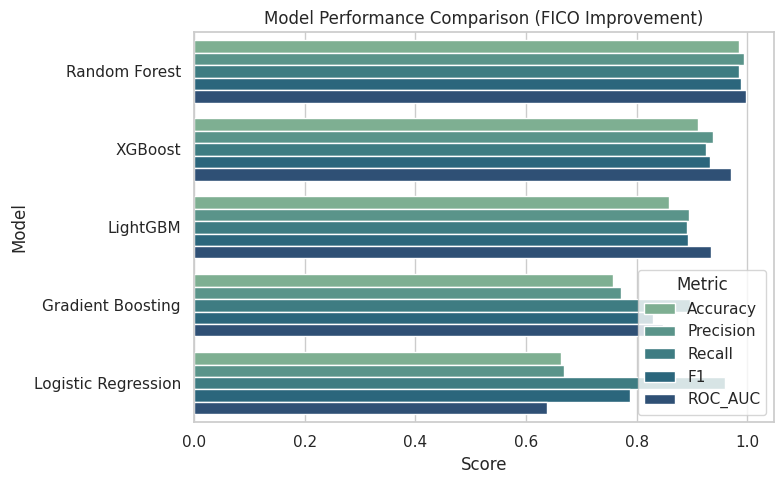


 Using best model: Random Forest

Sample Predictions:
   ACCOUNT  GENERATION  Pred_Prob_Improve         Pred_Label
0      784           2           1.000000  Likely to Improve
1       92           1           0.000000           Unlikely
2      494           1           0.653598  Likely to Improve
3      498           2           1.000000  Likely to Improve
4      498           2           1.000000  Likely to Improve
5      498           2           1.000000  Likely to Improve
6      624           4           0.000000           Unlikely
7      624           4           0.000000           Unlikely
8      697           4           0.000000           Unlikely
9      697           4           0.000000           Unlikely


/tmp/ipython-input-736404714.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fi, y=fi.index, palette="Blues_r")


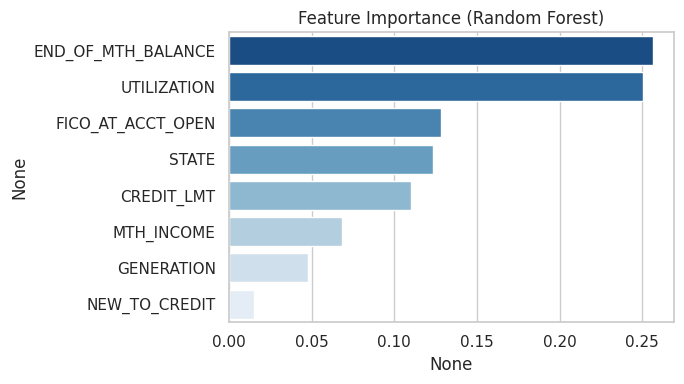

Predictions saved to fico_predictions.csv


In [ ]:
# # -*- coding: utf-8 -*-
# """
# Compare multiple models for FICO Improvement Prediction
# and make predictions for selected data points.
# Also saves label mappings for all encoded categorical columns.
# """

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import json

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score,
#     f1_score, roc_auc_score
# )

# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier

# encoders = {}
# encoded_df = df.copy()  # keep a clean copy

# categorical_cols = ['GENERATION', 'STATE', 'SPENDCATEGORYNM', 'UTIL_BAND']

# for col in categorical_cols:
#     le = LabelEncoder()
#     encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))

#     encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# encoders_json_safe = {
#     col: {str(k): int(v) for k, v in mapping.items()}
#     for col, mapping in encoders.items()
# }

# with open("label_mappings.json", "w") as f:
#     json.dump(encoders_json_safe, f, indent=4)

# print("Label mappings saved safely to label_mappings.json")


# encoded_df['TARGET_IMPROVE'] = encoded_df['IMPROVEMENT_STATUS'].apply(lambda x: 1 if x == 'Improved' else 0)


# features = [
#     'GENERATION', 'STATE', 'MTH_INCOME', 'CREDIT_LMT',
#     'UTILIZATION', 'END_OF_MTH_BALANCE', 'NEW_TO_CREDIT', 'FICO_AT_ACCT_OPEN'
# ]
# X = encoded_df[features]
# y = encoded_df['TARGET_IMPROVE']


# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )


# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
#     "Gradient Boosting": GradientBoostingClassifier(random_state=42),
#     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
#     "LightGBM": LGBMClassifier(random_state=42)
# }


# results = []

# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     y_prob = model.predict_proba(X_test)[:, 1]

#     results.append({
#         "Model": name,
#         "Accuracy": accuracy_score(y_test, y_pred),
#         "Precision": precision_score(y_test, y_pred),
#         "Recall": recall_score(y_test, y_pred),
#         "F1": f1_score(y_test, y_pred),
#         "ROC_AUC": roc_auc_score(y_test, y_prob)
#     })

# results_df = pd.DataFrame(results).sort_values("ROC_AUC", ascending=False)
# print("\n=== MODEL PERFORMANCE COMPARISON ===")
# print(results_df)

# plt.figure(figsize=(8, 5))
# sns.barplot(
#     data=results_df.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC']),
#     x='value', y='Model', hue='variable', palette='crest'
# )
# plt.title("Model Performance Comparison (FICO Improvement)")
# plt.xlabel("Score")
# plt.legend(title="Metric")
# plt.tight_layout()
# plt.show()


# best_model_name = results_df.iloc[0]['Model']
# best_model = models[best_model_name]
# print(f"\n Using best model: {best_model_name}")


# best_model.fit(X, y)

# encoded_df['Pred_Prob_Improve'] = best_model.predict_proba(X)[:, 1]
# encoded_df['Pred_Label'] = np.where(encoded_df['Pred_Prob_Improve'] >= 0.5, 'Likely to Improve', 'Unlikely')


# print("\nSample Predictions:")
# print(encoded_df[['ACCOUNT', 'GENERATION', 'Pred_Prob_Improve', 'Pred_Label']].head(10))


# if hasattr(best_model, "feature_importances_"):
#     fi = pd.Series(best_model.feature_importances_, index=features).sort_values(ascending=False)
#     plt.figure(figsize=(7, 4))
#     sns.barplot(x=fi, y=fi.index, palette="Blues_r")
#     plt.title(f"Feature Importance ({best_model_name})")
#     plt.tight_layout()
#     plt.show()


# encoded_df.to_csv("fico_predictions.csv", index=False)
# print("Predictions saved to fico_predictions.csv")


In [ ]:
# print("Encoders created for:", list(encoders.keys()))


Encoders created for: ['GENERATION', 'STATE', 'SPENDCATEGORYNM', 'UTIL_BAND']


In [ ]:
# decoded_df = encoded_df.copy()

# for col in categorical_cols:
#     reverse_map = {v: k for k, v in encoders[col].items()}
#     decoded_df[col] = decoded_df[col].map(reverse_map)

/tmp/ipython-input-1988998828.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=improve_by_gen, x='Pred_Prob_Improve', y='GENERATION', palette='Blues_r')


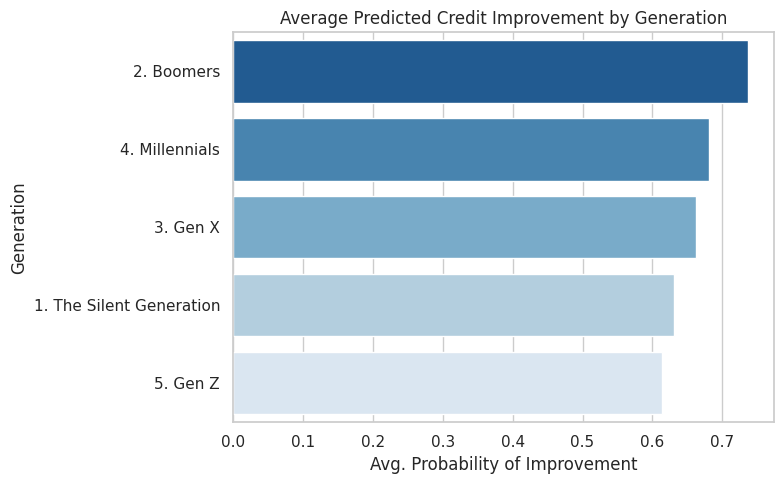

                 GENERATION  Pred_Prob_Improve
0                2. Boomers           0.737235
1            4. Millennials           0.680825
2                  3. Gen X           0.662365
3  1. The Silent Generation           0.630417
4                  5. Gen Z           0.614402


In [ ]:
# improve_by_gen = (
#     encoded_df.groupby('GENERATION')['Pred_Prob_Improve']
#     .mean()
#     .sort_values(ascending=False)
#     .reset_index()
# )

# # Map encoded generations back to text if needed
# generation_map = {v: k for k, v in encoders['GENERATION'].items()}
# improve_by_gen['GENERATION'] = improve_by_gen['GENERATION'].map(generation_map)

# plt.figure(figsize=(8,5))
# sns.barplot(data=improve_by_gen, x='Pred_Prob_Improve', y='GENERATION', palette='Blues_r')
# plt.title("Average Predicted Credit Improvement by Generation")
# plt.xlabel("Avg. Probability of Improvement")
# plt.ylabel("Generation")
# plt.tight_layout()
# plt.show()

# print(improve_by_gen)


/tmp/ipython-input-1803587442.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=improve_by_gen, x='Pred_Prob_Improve', y='GENERATION', palette='Blues_r')


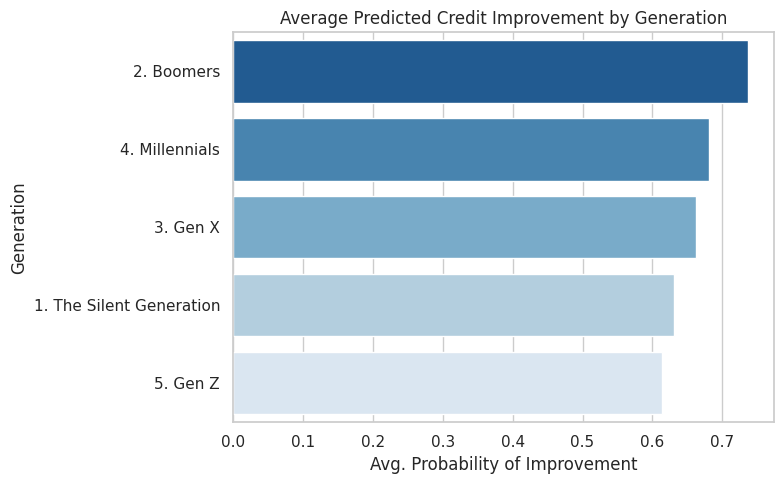

In [ ]:
improve_by_gen = (
    decoded_df.groupby('GENERATION')['Pred_Prob_Improve']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(data=improve_by_gen, x='Pred_Prob_Improve', y='GENERATION', palette='Blues_r')
plt.title("Average Predicted Credit Improvement by Generation")
plt.xlabel("Avg. Probability of Improvement")
plt.ylabel("Generation")
plt.tight_layout()
plt.show()


/tmp/ipython-input-750141456.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=improve_by_state.head(10), x='Pred_Prob_Improve', y='STATE', palette='crest')


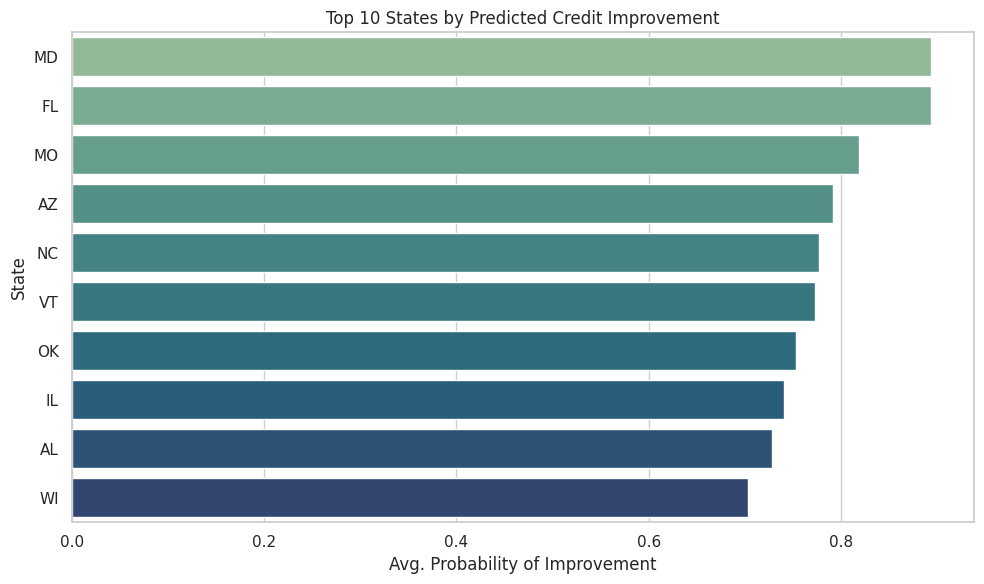

  STATE  Pred_Prob_Improve
0    MD           0.893681
1    FL           0.893508
2    MO           0.818779
3    AZ           0.792164
4    NC           0.776713
5    VT           0.773250
6    OK           0.753240
7    IL           0.740373
8    AL           0.728037
9    WI           0.703658


In [ ]:
improve_by_state = (
    encoded_df.groupby('STATE')['Pred_Prob_Improve']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

state_map = {v: k for k, v in encoders['STATE'].items()}
improve_by_state['STATE'] = improve_by_state['STATE'].map(state_map)

plt.figure(figsize=(10,6))
sns.barplot(data=improve_by_state.head(10), x='Pred_Prob_Improve', y='STATE', palette='crest')
plt.title("Top 10 States by Predicted Credit Improvement")
plt.xlabel("Avg. Probability of Improvement")
plt.ylabel("State")
plt.tight_layout()
plt.show()

print(improve_by_state.head(10))
# improve_by_state = (
#     decoded_df.groupby('STATE')['Pred_Prob_Improve']
#     .mean()
#     .sort_values(ascending=False)
#     .reset_index()
# )

# plt.figure(figsize=(10,6))
# sns.barplot(data=improve_by_state.head(10), x='Pred_Prob_Improve', y='STATE', palette='crest')
# plt.title("Top 10 States by Predicted Credit Improvement")
# plt.xlabel("Avg. Probability of Improvement")
# plt.ylabel("State")
# plt.tight_layout()
# plt.show()


In [ ]:

# improve_by_util = (
#     decoded_df.groupby('UTIL_BAND')['Pred_Prob_Improve']
#     .mean()
#     .sort_values(ascending=False)
#     .reset_index()
# )

# plt.figure(figsize=(8,5))
# sns.barplot(data=improve_by_util, x='Pred_Prob_Improve', y='UTIL_BAND', palette='viridis')
# plt.title("Predicted Improvement by Credit Utilization Band")
# plt.xlabel("Avg. Probability of Improvement")
# plt.ylabel("Utilization Band")
# plt.tight_layout()
# plt.show()


/tmp/ipython-input-3639778377.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=improve_by_util, x='Pred_Prob_Improve', y='UTIL_BAND_NAME', palette='viridis')


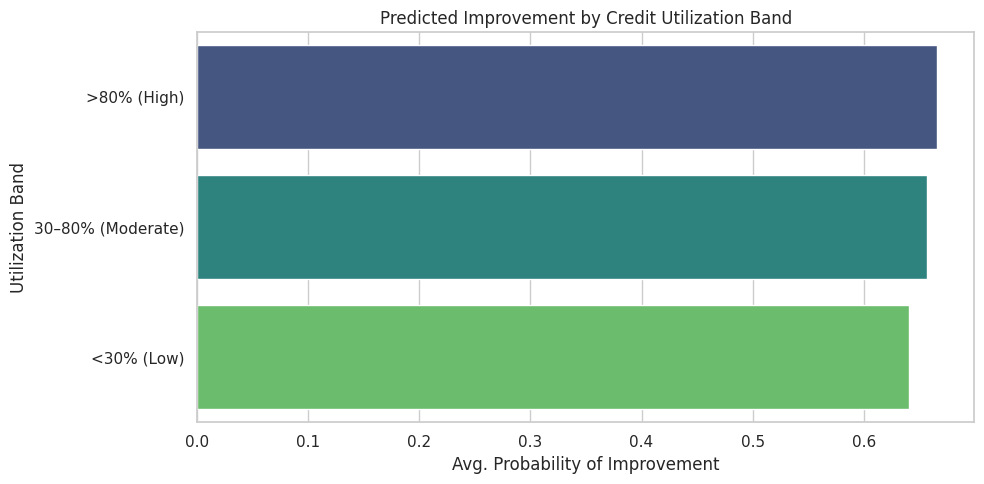

      UTIL_BAND_NAME  Pred_Prob_Improve
0        >80% (High)            0.66604
1  30–80% (Moderate)            0.65670
2         <30% (Low)            0.64043


In [ ]:
util_map = {v: k for k, v in encoders['UTIL_BAND'].items()}
encoded_df['UTIL_BAND_NAME'] = encoded_df['UTIL_BAND'].map(util_map)

improve_by_util = (
    encoded_df.groupby('UTIL_BAND_NAME')['Pred_Prob_Improve']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

sns.barplot(data=improve_by_util, x='Pred_Prob_Improve', y='UTIL_BAND_NAME', palette='viridis')
plt.title("Predicted Improvement by Credit Utilization Band")
plt.xlabel("Avg. Probability of Improvement")
plt.ylabel("Utilization Band")
plt.tight_layout()
plt.show()

print(improve_by_util)


/tmp/ipython-input-2195614799.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  encoded_df.groupby('Income_Band')['Pred_Prob_Improve']
/tmp/ipython-input-2195614799.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=improve_by_income, x='Pred_Prob_Improve', y='Income_Band', palette='coolwarm')


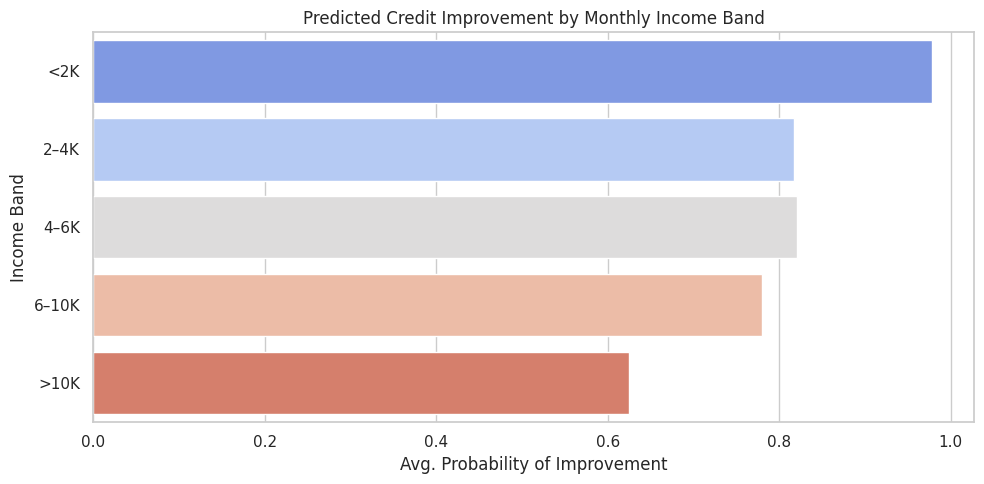

  Income_Band  Pred_Prob_Improve
0         <2K           0.978410
1        4–6K           0.820558
2        2–4K           0.817002
3       6–10K           0.780057
4        >10K           0.624409


In [ ]:
encoded_df['Income_Band'] = pd.cut(
    encoded_df['MTH_INCOME'],
    bins=[0, 2000, 4000, 6000, 10000, np.inf],
    labels=['<2K', '2–4K', '4–6K', '6–10K', '>10K']
)

improve_by_income = (
    encoded_df.groupby('Income_Band')['Pred_Prob_Improve']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

sns.barplot(data=improve_by_income, x='Pred_Prob_Improve', y='Income_Band', palette='coolwarm')
plt.title("Predicted Credit Improvement by Monthly Income Band")
plt.xlabel("Avg. Probability of Improvement")
plt.ylabel("Income Band")
plt.tight_layout()
plt.show()
print(improve_by_income)

In [ ]:

df['TRANSACTIONDT'] = pd.to_datetime(df['TRANSACTIONDT'])

max_date = df['TRANSACTIONDT'].max()

churn_cutoff = max_date - pd.DateOffset(months=3)

active_accounts = df.loc[df['TRANSACTIONDT'] >= churn_cutoff, 'ACCOUNT'].unique()

df['CHURNED'] = np.where(df['ACCOUNT'].isin(active_accounts), 0, 1)


In [ ]:
customer_df = (
    df.groupby('ACCOUNT')
    .agg({
        'GENERATION': 'first',
        'STATE': 'first',
        'SPENDCATEGORYNM': lambda x: x.mode()[0] if len(x) > 0 else 'Unknown',
        'UTIL_BAND': 'first',
        'MTH_INCOME': 'mean',
        'CREDIT_LMT': 'mean',
        'UTILIZATION': 'mean',
        'END_OF_MTH_BALANCE': 'mean',
        'NEW_TO_CREDIT': 'first',
        'FICO_AT_ACCT_OPEN': 'first',
        'CHURNED': 'first'
    })
    .reset_index()
)


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

categorical_cols = ['GENERATION', 'STATE', 'SPENDCATEGORYNM', 'UTIL_BAND']

encoders = {}
encoded_df = customer_df.copy()

for col in categorical_cols:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))
    encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))

X = encoded_df.drop(columns=['ACCOUNT', 'CHURNED'])
y = encoded_df['CHURNED']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC_AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.7767441860465116
ROC_AUC: 0.7042063287882686


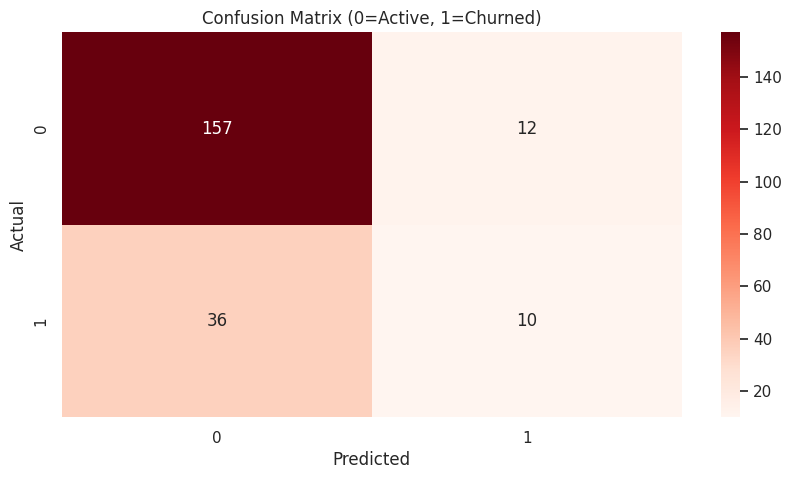

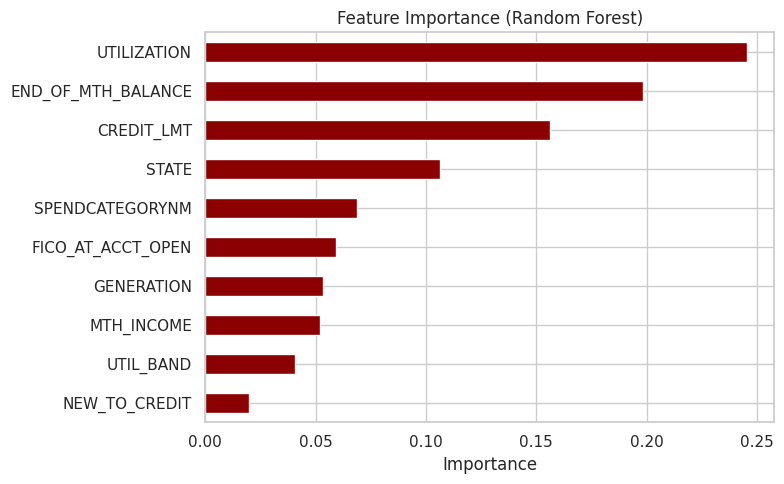

✅ Churn predictions saved to churn_predictions.csv


In [ ]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix (0=Active, 1=Churned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

if hasattr(model, 'feature_importances_'):
    fi = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
    plt.figure(figsize=(8,5))
    fi.plot(kind='barh', color='darkred')
    plt.title("Feature Importance (Random Forest)")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

encoded_df['Pred_Prob_Churn'] = model.predict_proba(X)[:, 1]
encoded_df['Pred_Label'] = np.where(encoded_df['Pred_Prob_Churn'] >= 0.5, 'Likely to Churn', 'Active')

encoded_df.to_csv("churn_predictions.csv", index=False)
print("Churn predictions saved to churn_predictions.csv")

In [ ]:
from sklearn.preprocessing import LabelEncoder

print("GENERATION unique values in encoded_df:", encoded_df['GENERATION'].unique())
print("Encoder mapping from encoders['GENERATION']:")
print(encoders.get('GENERATION', {}))


GENERATION unique values in encoded_df: [2 3 1 4 0]
Encoder mapping from encoders['GENERATION']:
{'1. The Silent Generation': np.int64(0), '2. Boomers': np.int64(1), '3. Gen X': np.int64(2), '4. Millennials': np.int64(3), '5. Gen Z': np.int64(4)}


In [ ]:

try:
    gen_map = {v: k for k, v in encoders['GENERATION'].items()}
except:
    gen_map = {k: v for v, k in encoders['GENERATION'].items()}


/tmp/ipython-input-2919324840.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


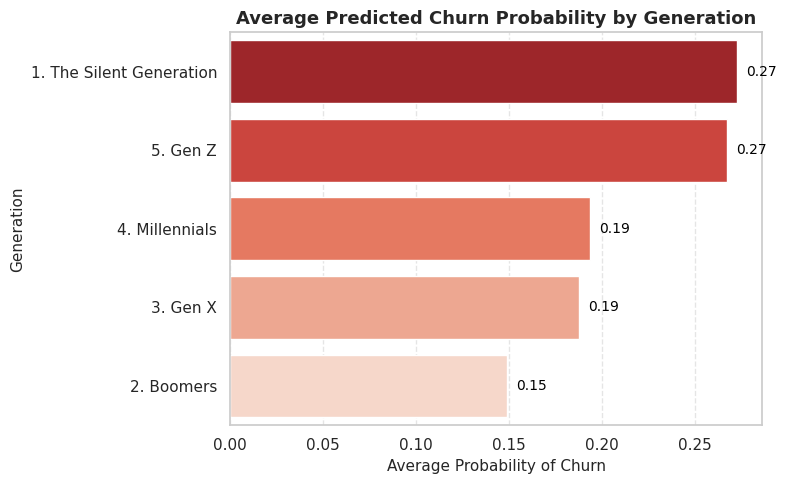

                 GENERATION  Pred_Prob_Churn
0  1. The Silent Generation         0.272381
1                  5. Gen Z         0.267159
2            4. Millennials         0.193613
3                  3. Gen X         0.187660
4                2. Boomers         0.148902


In [ ]:
import matplotlib.ticker as mticker
import seaborn as sns
import matplotlib.pyplot as plt

churn_by_gen = (
    encoded_df.groupby('GENERATION')['Pred_Prob_Churn']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

churn_by_gen['GENERATION'] = churn_by_gen['GENERATION'].map(gen_map)

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=churn_by_gen,
    x='Pred_Prob_Churn',
    y='GENERATION',
    palette='Reds_r'
)

plt.title("Average Predicted Churn Probability by Generation", fontsize=13, weight='bold')
plt.xlabel("Average Probability of Churn", fontsize=11)
plt.ylabel("Generation", fontsize=11)

ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
for i, v in enumerate(churn_by_gen['Pred_Prob_Churn']):
    ax.text(v + 0.005, i, f"{v:.2f}", color='black', va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
print(churn_by_gen)

In [ ]:
def plot_churn_group(encoded_df, col, encoders, top_n=None, palette='Reds_r'):
    churn_df = (
        encoded_df.groupby(col)['Pred_Prob_Churn']
        .mean()
        .sort_values(ascending=False)
        .reset_index()
    )

    # Decode labels if encoder exists
    if col in encoders:
        reverse_map = {v: k for k, v in encoders[col].items()}
        churn_df[col] = churn_df[col].map(reverse_map)

    # Limit rows if requested
    if top_n:
        churn_df = churn_df.head(top_n)

    # Plot
    plt.figure(figsize=(10,6))
    ax = sns.barplot(data=churn_df, x='Pred_Prob_Churn', y=col, palette=palette)
    plt.title(f"Average Predicted Churn Probability by {col}", fontsize=13, weight='bold')
    plt.xlabel("Average Probability of Churn", fontsize=11)
    plt.ylabel(col, fontsize=11)
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))

    for i, v in enumerate(churn_df['Pred_Prob_Churn']):
        ax.text(v + 0.005, i, f"{v:.2f}", color='black', va='center', fontsize=10)

    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    return churn_df


/tmp/ipython-input-3395310201.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_df, x='Pred_Prob_Churn', y=col, palette=palette)


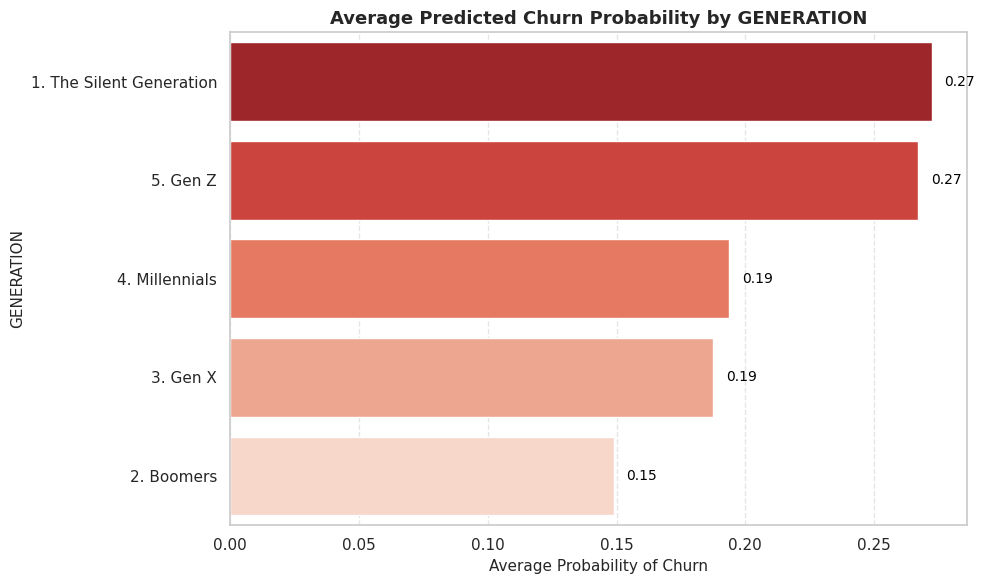

/tmp/ipython-input-3395310201.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_df, x='Pred_Prob_Churn', y=col, palette=palette)


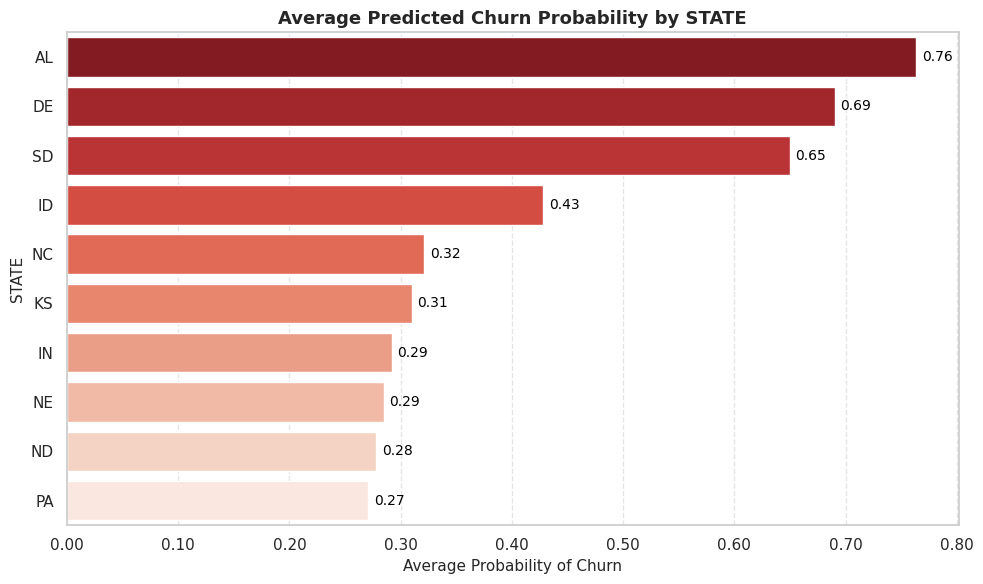

/tmp/ipython-input-3395310201.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_df, x='Pred_Prob_Churn', y=col, palette=palette)


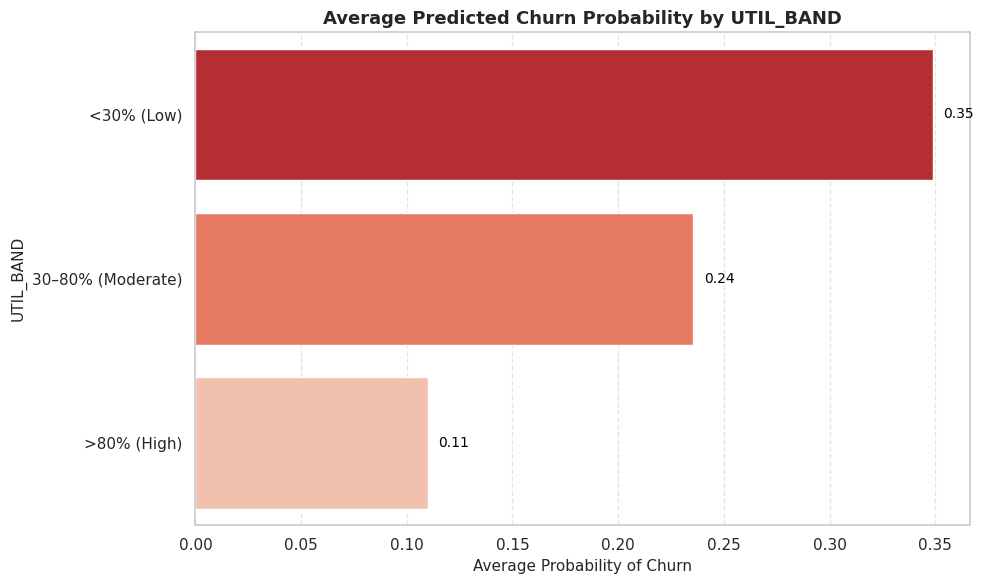

/tmp/ipython-input-3395310201.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=churn_df, x='Pred_Prob_Churn', y=col, palette=palette)


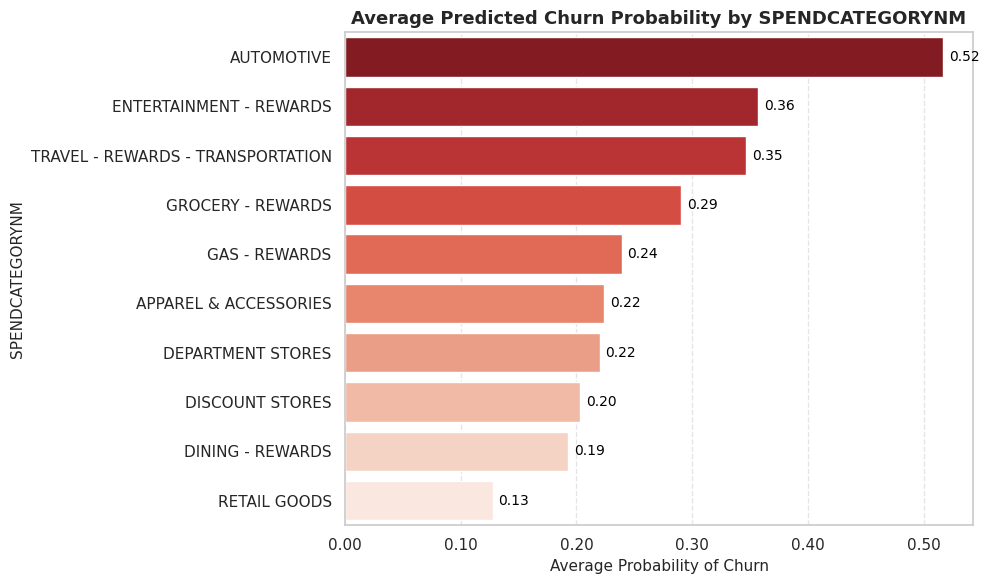

,SPENDCATEGORYNM,Pred_Prob_Churn
0,AUTOMOTIVE,0.516667
1,ENTERTAINMENT - REWARDS,0.356667
2,TRAVEL - REWARDS - TRANSPORTATION,0.346667
3,GROCERY - REWARDS,0.290223
4,GAS - REWARDS,0.238893
5,APPAREL & ACCESSORIES,0.223889
6,DEPARTMENT STORES,0.220000
7,DISCOUNT STORES,0.203333
8,DINING - REWARDS,0.192909
9,RETAIL GOODS,0.127606


In [ ]:
plot_churn_group(encoded_df, 'GENERATION', encoders)
plot_churn_group(encoded_df, 'STATE', encoders, top_n=10)
plot_churn_group(encoded_df, 'UTIL_BAND', encoders)
plot_churn_group(encoded_df, 'SPENDCATEGORYNM', encoders, top_n=10)

In [ ]:
# import pandas as pd
# import numpy as np

# df['TRANSACTIONDT'] = pd.to_datetime(df['TRANSACTIONDT'])


# df['TRANSACTION_MONTH'] = df['TRANSACTIONDT'].dt.to_period('M')

# monthly_spend = (
#     df.groupby(['ACCOUNT', 'TRANSACTION_MONTH'])['TRANSACTIONAMT']
#     .sum()
#     .reset_index()
#     .rename(columns={'TRANSACTIONAMT': 'MONTHLY_SPEND'})
# )

# monthly_spend = monthly_spend.sort_values(['ACCOUNT', 'TRANSACTION_MONTH'])

# monthly_spend['NEXT_MONTH_SPEND'] = monthly_spend.groupby('ACCOUNT')['MONTHLY_SPEND'].shift(-1)
# monthly_spend['SPEND_INCREASED'] = np.where(
#     monthly_spend['NEXT_MONTH_SPEND'] > monthly_spend['MONTHLY_SPEND'], 1, 0
# )

# monthly_spend = monthly_spend.dropna(subset=['NEXT_MONTH_SPEND'])


In [ ]:

# feature_cols = [
#     'ACCOUNT', 'GENERATION', 'STATE', 'UTIL_BAND', 'MTH_INCOME',
#     'CREDIT_LMT', 'UTILIZATION', 'END_OF_MTH_BALANCE', 'NEW_TO_CREDIT'
# ]

# customer_features = df[feature_cols].drop_duplicates(subset=['ACCOUNT'])

# spend_df = monthly_spend.merge(customer_features, on='ACCOUNT', how='left')


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

# categorical_cols = ['GENERATION', 'STATE', 'UTIL_BAND']
# encoders = {}

# encoded_df = spend_df.copy()
# for col in categorical_cols:
#     le = LabelEncoder()
#     encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))
#     encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# X = encoded_df[['GENERATION', 'STATE', 'UTIL_BAND', 'MTH_INCOME', 'CREDIT_LMT',
#                 'UTILIZATION', 'END_OF_MTH_BALANCE', 'NEW_TO_CREDIT', 'MONTHLY_SPEND']]
# y = encoded_df['SPEND_INCREASED']

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )


In [ ]:
# model = RandomForestClassifier(n_estimators=300, random_state=42)
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# y_prob = model.predict_proba(X_test)[:, 1]

# print("\n=== MODEL PERFORMANCE (Who Will Spend More Next Month) ===")
# print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
# print(f"Precision: {precision_score(y_test, y_pred):.3f}")
# print(f"Recall:    {recall_score(y_test, y_pred):.3f}")
# print(f"F1 Score:  {f1_score(y_test, y_pred):.3f}")
# print(f"ROC-AUC:   {roc_auc_score(y_test, y_prob):.3f}")



=== MODEL PERFORMANCE (Who Will Spend More Next Month) ===
Accuracy:  0.641
Precision: 0.644
Recall:    0.631
F1 Score:  0.637
ROC-AUC:   0.697


In [ ]:
# encoded_df['Pred_Prob_SpendIncrease'] = model.predict_proba(X)[:, 1]
# encoded_df['Pred_Label_Spend'] = np.where(encoded_df['Pred_Prob_SpendIncrease'] >= 0.5,
#                                           'Likely to Spend More', 'Likely to Spend Less')

# # Show examples
# print(encoded_df[['ACCOUNT', 'TRANSACTION_MONTH', 'Pred_Prob_SpendIncrease', 'Pred_Label_Spend']].head(10))


   ACCOUNT TRANSACTION_MONTH  Pred_Prob_SpendIncrease      Pred_Label_Spend
0        1           2024-06                 0.956667  Likely to Spend More
1        1           2024-07                 0.190000  Likely to Spend Less
2        1           2024-08                 0.800000  Likely to Spend More
3        1           2024-09                 0.946667  Likely to Spend More
4        1           2024-10                 0.713333  Likely to Spend More
5        1           2024-11                 0.703333  Likely to Spend More
6        1           2024-12                 0.356667  Likely to Spend Less
7        1           2025-01                 0.897251  Likely to Spend More
8        1           2025-03                 0.160000  Likely to Spend Less
9        1           2025-04                 0.946667  Likely to Spend More


Customer-level rows: 1,072


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:31:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 544, number of negative: 313
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 857, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.634772 -> initscore=0.552746
[LightGBM] [Info] Start training from score 0.552746
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

=== MODEL PERFORMANCE COMPARISON ===
                 Model  Accuracy  Precision    Recall        F1   ROC_AUC
2    Gradient Boosting  0.632558   0.686391  0.816901  0.745981  0.599267
1        Random Forest  0.613953   0.697987  0.732394  0.714777  0.589668
3              XGBoost  0.609302   0.695946  0.725352  0.710345  0.581806
4             LightGBM  0.590698   0.68493

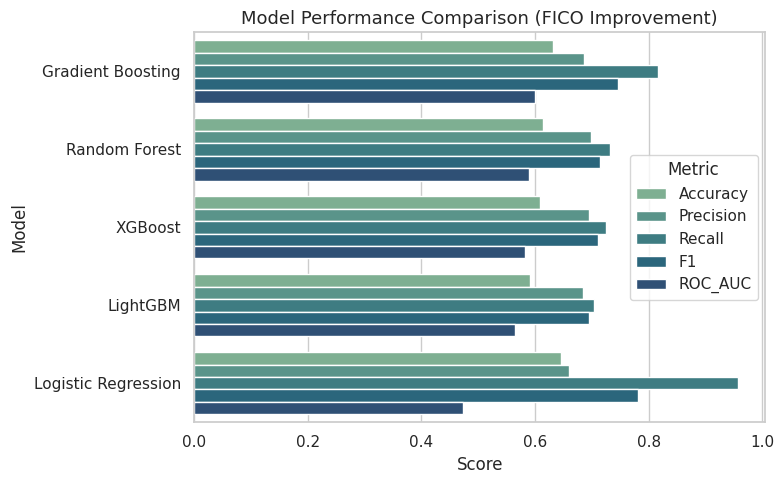


Using best model: Gradient Boosting

Confusion Matrix:


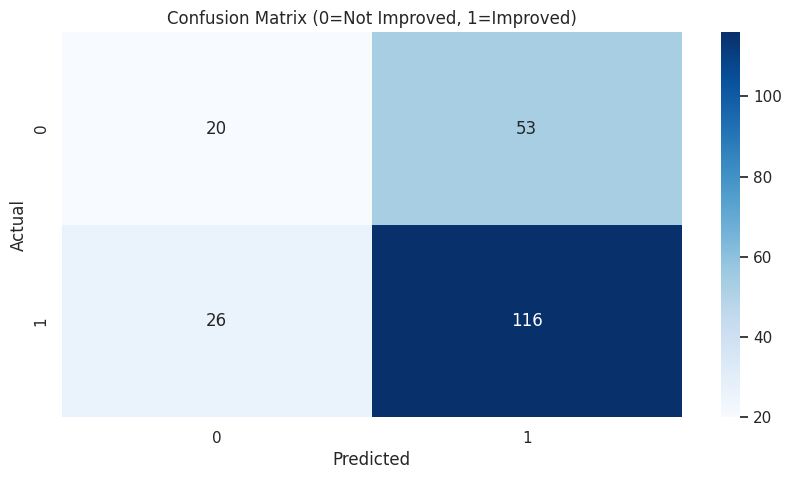

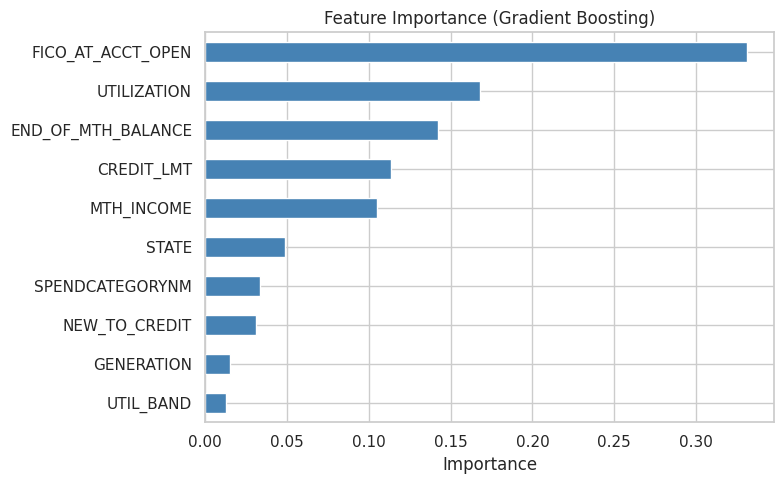

Predictions saved to fico_predictions_leakproof.csv


/tmp/ipython-input-1949907056.py:202: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_df, x='Pred_Prob_Improve', y=col, palette=palette)


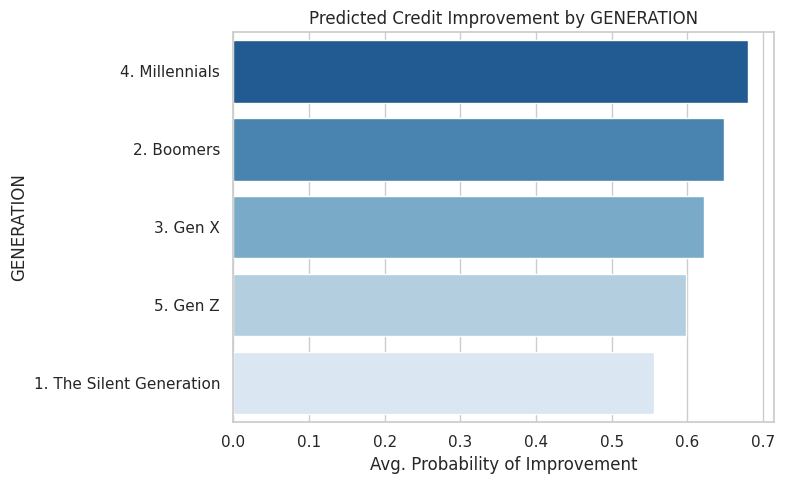

/tmp/ipython-input-1949907056.py:202: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_df, x='Pred_Prob_Improve', y=col, palette=palette)


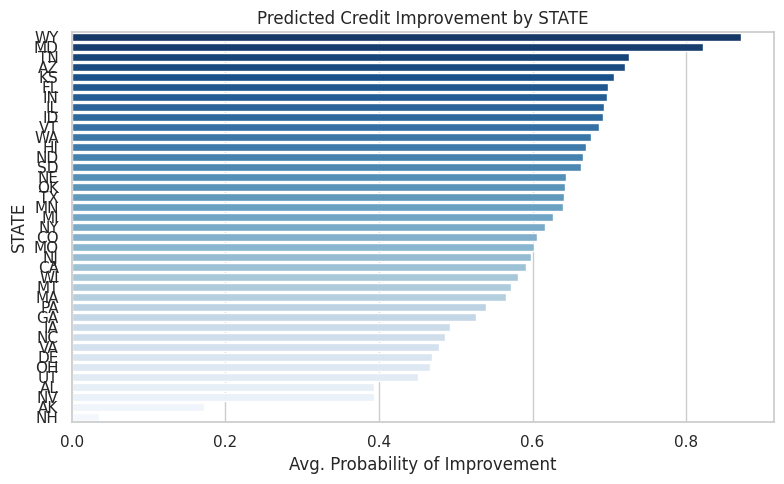

/tmp/ipython-input-1949907056.py:202: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_df, x='Pred_Prob_Improve', y=col, palette=palette)


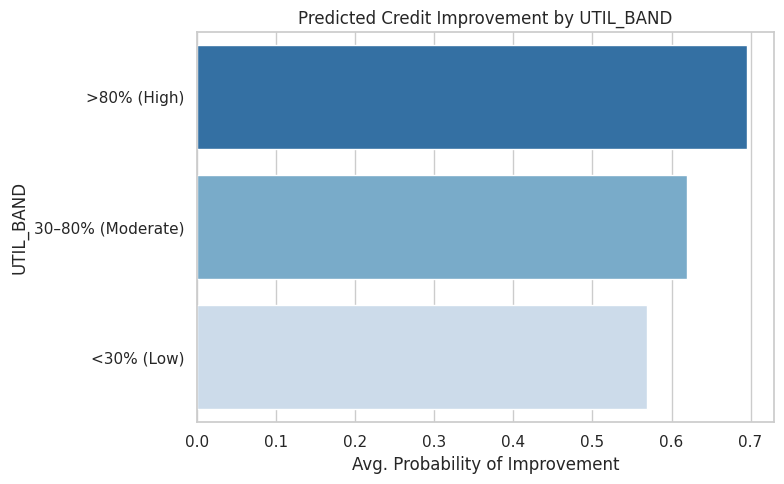

/tmp/ipython-input-1949907056.py:202: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_df, x='Pred_Prob_Improve', y=col, palette=palette)


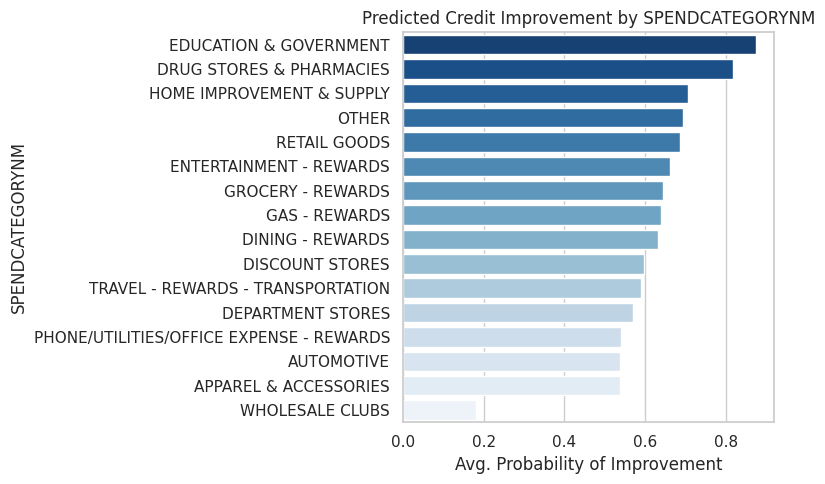

/tmp/ipython-input-1949907056.py:222: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  encoded_df.groupby('Income_Band')['Pred_Prob_Improve']
/tmp/ipython-input-1949907056.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=income_df, x='Pred_Prob_Improve', y='Income_Band', palette='coolwarm')


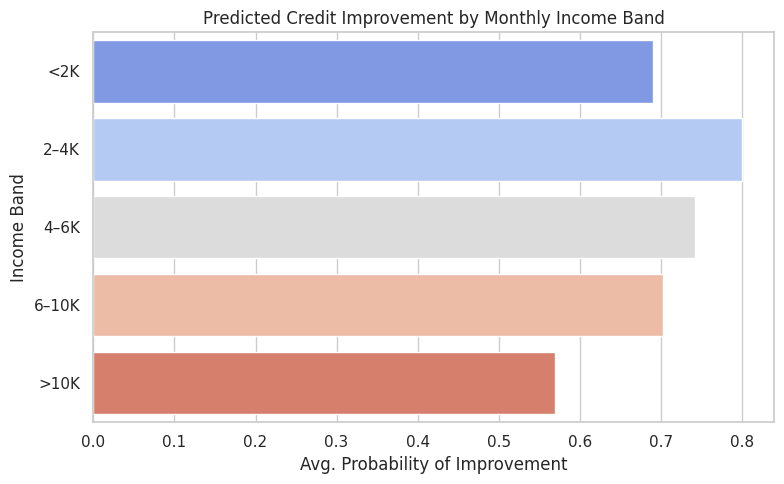

  Income_Band  Pred_Prob_Improve
0        2–4K           0.799557
1        4–6K           0.742582
2       6–10K           0.702509
3         <2K           0.690653
4        >10K           0.568981


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# Assuming df is your transaction-level dataframe
# Convert date column if not already datetime
df['TRANSACTIONDT'] = pd.to_datetime(df['TRANSACTIONDT'])

# Derive churn indicator (optional)
max_date = df['TRANSACTIONDT'].max()
churn_cutoff = max_date - pd.DateOffset(months=3)
active_accounts = df.loc[df['TRANSACTIONDT'] >= churn_cutoff, 'ACCOUNT'].unique()
df['CHURNED'] = np.where(df['ACCOUNT'].isin(active_accounts), 0, 1)


customer_df = (
    df.groupby('ACCOUNT')
    .agg({
        'GENERATION': 'first',
        'STATE': 'first',
        'SPENDCATEGORYNM': lambda x: x.mode()[0] if len(x) > 0 else 'Unknown',
        'UTIL_BAND': 'first',
        'MTH_INCOME': 'mean',
        'CREDIT_LMT': 'mean',
        'UTILIZATION': 'mean',
        'END_OF_MTH_BALANCE': 'mean',
        'NEW_TO_CREDIT': 'first',
        'FICO_AT_ACCT_OPEN': 'first',
        'IMPROVEMENT_STATUS': 'first'  # target variable
    })
    .reset_index()
)

print(f"Customer-level rows: {len(customer_df):,}")

# Encode target
customer_df['TARGET_IMPROVE'] = np.where(customer_df['IMPROVEMENT_STATUS'] == 'Improved', 1, 0)


categorical_cols = ['GENERATION', 'STATE', 'SPENDCATEGORYNM', 'UTIL_BAND']
encoders = {}
encoded_df = customer_df.copy()

for col in categorical_cols:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))
    encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Save label encoders (optional)
encoders_json_safe = {
    col: {str(k): int(v) for k, v in mapping.items()}
    for col, mapping in encoders.items()
}
with open("label_mappings.json", "w") as f:
    json.dump(encoders_json_safe, f, indent=4)


unique_accounts = encoded_df['ACCOUNT'].unique()
train_accounts, test_accounts = train_test_split(
    unique_accounts, test_size=0.2, random_state=42
)

train_df = encoded_df[encoded_df['ACCOUNT'].isin(train_accounts)]
test_df = encoded_df[encoded_df['ACCOUNT'].isin(test_accounts)]

features = [
    'GENERATION', 'STATE', 'SPENDCATEGORYNM', 'UTIL_BAND',
    'MTH_INCOME', 'CREDIT_LMT', 'UTILIZATION',
    'END_OF_MTH_BALANCE', 'NEW_TO_CREDIT', 'FICO_AT_ACCT_OPEN'
]

X_train, y_train = train_df[features], train_df['TARGET_IMPROVE']
X_test, y_test = test_df[features], test_df['TARGET_IMPROVE']


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_prob)
    })

results_df = pd.DataFrame(results).sort_values("ROC_AUC", ascending=False)
print("\n=== MODEL PERFORMANCE COMPARISON ===")
print(results_df)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=results_df.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC']),
    x='value', y='Model', hue='variable', palette='crest'
)
plt.title("Model Performance Comparison (FICO Improvement)", fontsize=13)
plt.xlabel("Score")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nUsing best model: {best_model_name}")

best_model.fit(X_train, y_train)
y_pred_final = best_model.predict(X_test)
y_prob_final = best_model.predict_proba(X_test)[:, 1]

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (0=Not Improved, 1=Improved)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


if hasattr(best_model, "feature_importances_"):
    fi = pd.Series(best_model.feature_importances_, index=features).sort_values(ascending=True)
    plt.figure(figsize=(8,5))
    fi.plot(kind='barh', color='steelblue')
    plt.title(f"Feature Importance ({best_model_name})")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

encoded_df['Pred_Prob_Improve'] = best_model.predict_proba(encoded_df[features])[:, 1]
encoded_df['Pred_Label'] = np.where(encoded_df['Pred_Prob_Improve'] >= 0.5, 'Likely to Improve', 'Unlikely')

encoded_df.to_csv("fico_predictions_leakproof.csv", index=False)
print("Predictions saved to fico_predictions_leakproof.csv")


def plot_avg_prob_by_group(df, col, encoders, palette='Blues_r', title_prefix="Predicted Credit Improvement"):
    avg_df = df.groupby(col)['Pred_Prob_Improve'].mean().sort_values(ascending=False).reset_index()
    if col in encoders:
        reverse_map = {v: k for k, v in encoders[col].items()}
        avg_df[col] = avg_df[col].map(reverse_map)
    plt.figure(figsize=(8,5))
    sns.barplot(data=avg_df, x='Pred_Prob_Improve', y=col, palette=palette)
    plt.title(f"{title_prefix} by {col}")
    plt.xlabel("Avg. Probability of Improvement")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()
    return avg_df

plot_avg_prob_by_group(encoded_df, 'GENERATION', encoders)
plot_avg_prob_by_group(encoded_df, 'STATE', encoders)
plot_avg_prob_by_group(encoded_df, 'UTIL_BAND', encoders)
plot_avg_prob_by_group(encoded_df, 'SPENDCATEGORYNM', encoders)

# Income bands
encoded_df['Income_Band'] = pd.cut(
    encoded_df['MTH_INCOME'],
    bins=[0, 2000, 4000, 6000, 10000, np.inf],
    labels=['<2K', '2–4K', '4–6K', '6–10K', '>10K']
)
income_df = (
    encoded_df.groupby('Income_Band')['Pred_Prob_Improve']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
plt.figure(figsize=(8,5))
sns.barplot(data=income_df, x='Pred_Prob_Improve', y='Income_Band', palette='coolwarm')
plt.title("Predicted Credit Improvement by Monthly Income Band")
plt.xlabel("Avg. Probability of Improvement")
plt.ylabel("Income Band")
plt.tight_layout()
plt.show()
print(income_df)



🔹 Training Logistic Regression ...

🔹 Training Random Forest ...

🔹 Training Gradient Boosting ...

🔹 Training XGBoost ...

🔹 Training LightGBM ...
[LightGBM] [Info] Number of positive: 363, number of negative: 362
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3128
[LightGBM] [Info] Number of data points in the train set: 725, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500690 -> initscore=0.002759
[LightGBM] [Info] Start training from score 0.002759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

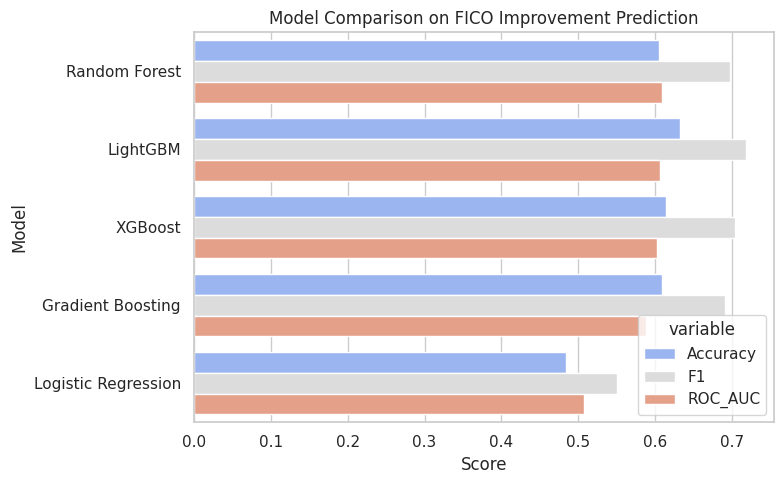

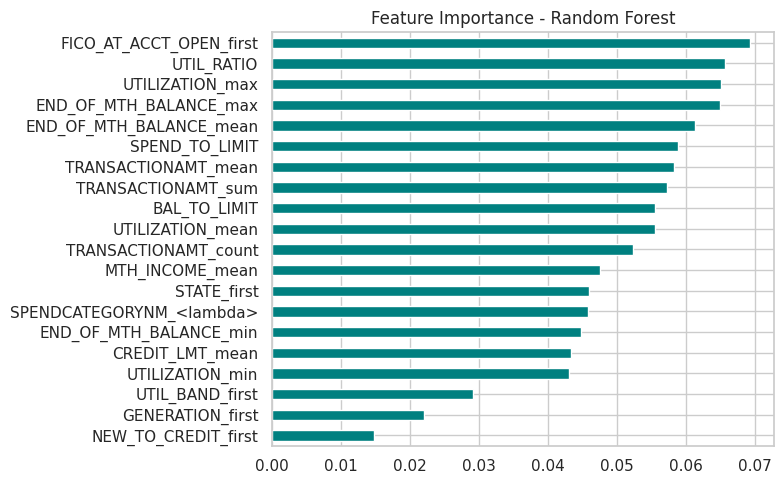

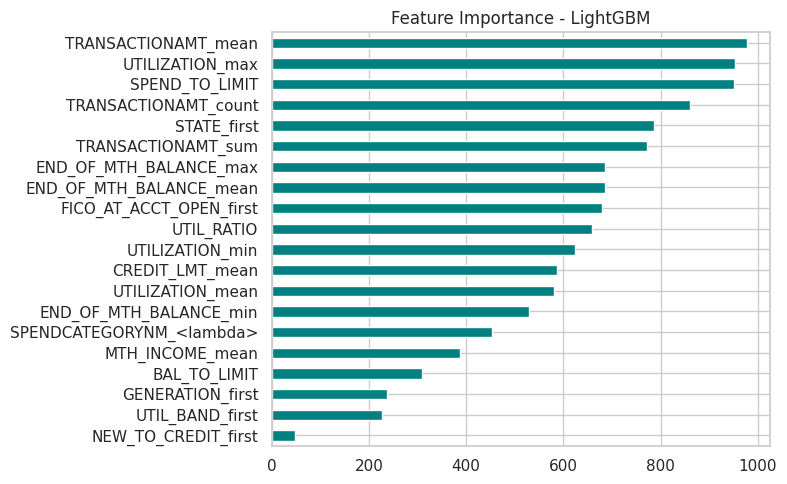

Saved predictions using best model: Random Forest


In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json, warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE


df['TRANSACTIONDT'] = pd.to_datetime(df['TRANSACTIONDT'])
customer_df = (
    df.groupby('ACCOUNT')
    .agg({
        'GENERATION': 'first',
        'STATE': 'first',
        'SPENDCATEGORYNM': lambda x: x.mode()[0] if len(x) > 0 else 'Unknown',
        'UTIL_BAND': 'first',
        'MTH_INCOME': 'mean',
        'CREDIT_LMT': 'mean',
        'UTILIZATION': ['mean','max','min'],
        'END_OF_MTH_BALANCE': ['mean','max','min'],
        'TRANSACTIONAMT': ['mean','sum','count'],
        'NEW_TO_CREDIT': 'first',
        'FICO_AT_ACCT_OPEN': 'first',
        'IMPROVEMENT_STATUS': 'first'
    })
)
customer_df.columns = ['_'.join(col).strip() for col in customer_df.columns.values]
customer_df.reset_index(inplace=True)

customer_df['TARGET_IMPROVE'] = np.where(customer_df['IMPROVEMENT_STATUS_first']=='Improved',1,0)


customer_df['UTIL_RATIO'] = customer_df['UTILIZATION_mean']/(customer_df['CREDIT_LMT_mean']+1)
customer_df['BAL_TO_LIMIT'] = customer_df['END_OF_MTH_BALANCE_mean']/(customer_df['CREDIT_LMT_mean']+1)
customer_df['SPEND_TO_LIMIT'] = customer_df['TRANSACTIONAMT_sum']/(customer_df['CREDIT_LMT_mean']+1)


categorical_cols = ['GENERATION_first','STATE_first','SPENDCATEGORYNM_<lambda>','UTIL_BAND_first']
encoders={}
encoded_df=customer_df.copy()
for col in categorical_cols:
    le=LabelEncoder()
    encoded_df[col]=le.fit_transform(encoded_df[col].astype(str))
    encoders[col]=dict(zip(le.classes_,le.transform(le.classes_)))


unique_accounts = encoded_df['ACCOUNT'].unique()
train_acc,test_acc=train_test_split(unique_accounts,test_size=0.2,random_state=42)
train_df=encoded_df[encoded_df['ACCOUNT'].isin(train_acc)]
test_df=encoded_df[encoded_df['ACCOUNT'].isin(test_acc)]

features=[col for col in encoded_df.columns if col not in ['ACCOUNT','IMPROVEMENT_STATUS_first','TARGET_IMPROVE']]

X_train,y_train=train_df[features],train_df['TARGET_IMPROVE']
X_test,y_test=test_df[features],test_df['TARGET_IMPROVE']

# Remove low-variance columns (avoids LGBM warnings)
sel=VarianceThreshold(threshold=0.0)
sel.fit(X_train)
X_train=X_train[X_train.columns[sel.get_support()]]
X_test=X_test[X_test.columns[sel.get_support()]]

sm=SMOTE(random_state=42)
X_train_res,y_train_res=sm.fit_resample(X_train,y_train)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_res)
X_test_scaled=scaler.transform(X_test)

# =====================
# STEP 5. MODEL DEFINITIONS + TUNING
# =====================

models={
 'Logistic Regression': LogisticRegression(max_iter=1000),
 'Random Forest': RandomForestClassifier(random_state=42),
 'Gradient Boosting': GradientBoostingClassifier(random_state=42),
 'XGBoost': XGBClassifier(eval_metric='logloss',use_label_encoder=False,random_state=42),
 'LightGBM': LGBMClassifier(random_state=42)
}

param_grids={
 'Random Forest': {'n_estimators':[200,400,600],'max_depth':[6,10,14,None]},
 'Gradient Boosting': {'n_estimators':[200,400,600],'learning_rate':[0.05,0.1,0.2]},
 'XGBoost': {'n_estimators':[200,400,600],'max_depth':[4,6,8],'learning_rate':[0.05,0.1,0.2]},
 'LightGBM': {'n_estimators':[200,400,600],'learning_rate':[0.05,0.1,0.2],'num_leaves':[15,31,63]}
}

results=[]
best_models={}

for name,model in models.items():
    print(f"\n🔹 Training {name} ...")
    if name in param_grids:
        grid=RandomizedSearchCV(model,param_grids[name],n_iter=5,cv=3,scoring='roc_auc',random_state=42)
        grid.fit(X_train_scaled,y_train_res)
        best_models[name]=grid.best_estimator_
    else:
        model.fit(X_train_scaled,y_train_res)
        best_models[name]=model

    y_pred=best_models[name].predict(X_test_scaled)
    y_prob=best_models[name].predict_proba(X_test_scaled)[:,1]
    results.append({
        'Model':name,
        'Accuracy':accuracy_score(y_test,y_pred),
        'Precision':precision_score(y_test,y_pred),
        'Recall':recall_score(y_test,y_pred),
        'F1':f1_score(y_test,y_pred),
        'ROC_AUC':roc_auc_score(y_test,y_prob)
    })

results_df=pd.DataFrame(results).sort_values('ROC_AUC',ascending=False)
print("\n=== MODEL PERFORMANCE COMPARISON ===")
print(results_df)

plt.figure(figsize=(8,5))
sns.barplot(data=results_df.melt(id_vars='Model',value_vars=['Accuracy','F1','ROC_AUC']),
            x='value',y='Model',hue='variable',palette='coolwarm')
plt.title("Model Comparison on FICO Improvement Prediction")
plt.xlabel("Score")
plt.tight_layout()
plt.show()


top_models=results_df['Model'].head(2).values
for name in top_models:
    model=best_models[name]
    if hasattr(model,'feature_importances_'):
        fi=pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=True)
        plt.figure(figsize=(8,5))
        fi.plot(kind='barh',color='teal')
        plt.title(f"Feature Importance - {name}")
        plt.tight_layout()
        plt.show()


best_name=results_df.iloc[0]['Model']
final_model=best_models[best_name]
encoded_df['Pred_Prob_Improve']=final_model.predict_proba(scaler.transform(encoded_df[X_train.columns]))[:,1]
encoded_df['Pred_Label']=np.where(encoded_df['Pred_Prob_Improve']>=0.5,'Likely to Improve','Unlikely')
encoded_df.to_csv("fico_predictions_multi_model.csv",index=False)
print(f"Saved predictions using best model: {best_name}")


In [ ]:
df.head()

,ACCOUNT,GENERATION,END_OF_MONTH_FICO,FICO_AT_ACCT_OPEN,VINTAGE_YYYYMM,STATE,MTH_INCOME,CREDIT_LMT,TRANSACTIONDT,TRANSACTIONAMT,...,SPENDCATEGORYNM,END_OF_MTH_BALANCE,UTILIZATION,TRANSACTION_MONTH,NEW_TO_CREDIT,FICO_IMPROVEMENT,IMPROVEMENT_STATUS,UTIL_BAND,MONTH,FICO_GROUP
0,784,3. Gen X,706,0,202410,FL,0,500,2024-12-31,30.00,...,OTHER,480.92,0.961840,2024-12,1,706,Improved,>80% (High),2024-12,Good
1,92,2. Boomers,621,638,202005,TX,2390,300,2025-02-03,14.60,...,RETAIL GOODS,278.03,0.926767,2025-02,0,-17,Declined,>80% (High),2025-02,Fair
2,494,2. Boomers,573,616,202404,TX,0,300,2025-04-25,16.24,...,RETAIL GOODS,0.00,0.000000,2025-04,0,-43,Declined,<30% (Low),2025-04,Poor
3,498,3. Gen X,667,0,202404,CO,0,300,2024-10-20,40.00,...,GAS - REWARDS,191.13,0.637100,2024-10,1,667,Improved,30–80% (Moderate),2024-10,Fair
4,498,3. Gen X,650,0,202404,CO,0,300,2024-11-03,37.73,...,GAS - REWARDS,177.09,0.590300,2024-11,1,650,Improved,30–80% (Moderate),2024-11,Fair


[LightGBM] [Info] Number of positive: 218, number of negative: 174
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2628
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.556122 -> initscore=0.225440
[LightGBM] [Info] Start training from score 0.225440
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

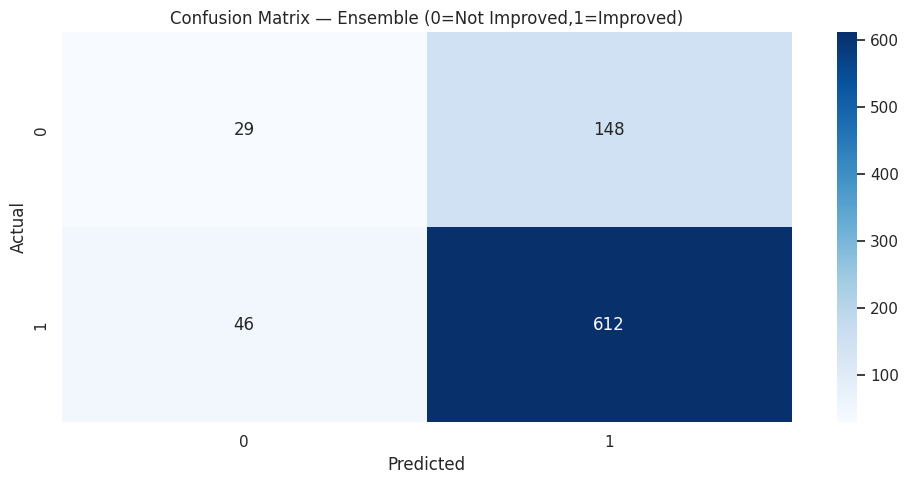

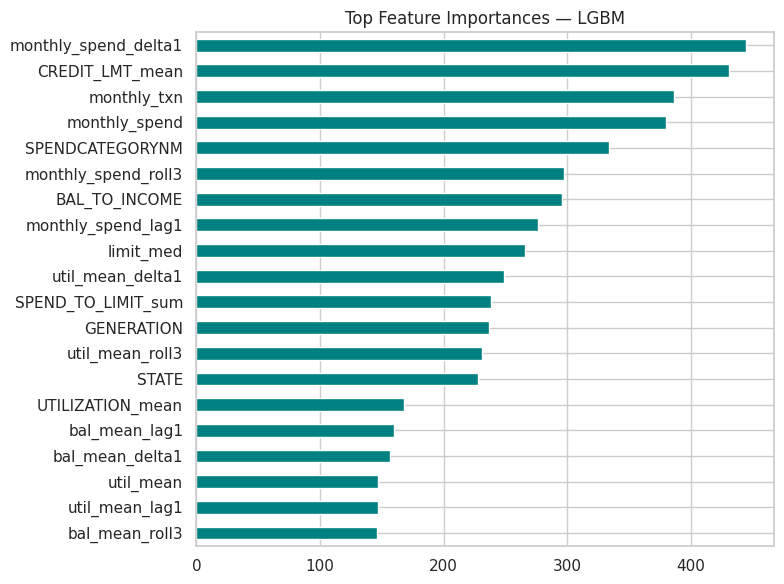

✅ Saved: fico_improvement_realistic.csv


In [ ]:

import warnings, json, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve)
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

df = df.copy()
df['TRANSACTIONDT'] = pd.to_datetime(df['TRANSACTIONDT'], errors='coerce')
df = df[df['TRANSACTIONDT'].notna()].sort_values(['ACCOUNT','TRANSACTIONDT'])
df['MONTH'] = df['TRANSACTIONDT'].dt.to_period('M').astype(str)

m = (
    df.groupby(['ACCOUNT','MONTH'])
      .agg(monthly_spend=('TRANSACTIONAMT','sum'),
           monthly_txn=('TRANSACTIONAMT','count'),
           util_mean=('UTILIZATION','mean'),
           bal_mean=('END_OF_MTH_BALANCE','mean'),
           income_med=('MTH_INCOME','median'),
           limit_med=('CREDIT_LMT','median'),
           fico_eom=('END_OF_MONTH_FICO','median'))
      .reset_index()
      .sort_values(['ACCOUNT','MONTH'])
)

for col in ['monthly_spend','util_mean','bal_mean']:
    m[f'{col}_lag1'] = m.groupby('ACCOUNT')[col].shift(1)
    m[f'{col}_delta1'] = m[col] - m[f'{col}_lag1']
    m[f'{col}_roll3']  = m.groupby('ACCOUNT')[col].rolling(3).mean().reset_index(0, drop=True)

m_feat = m.groupby('ACCOUNT').tail(1)

customer_df = (
    df.groupby('ACCOUNT')
      .agg({
          'GENERATION':'last',
          'STATE':'last',
          'SPENDCATEGORYNM':lambda x: x.mode().iloc[0] if len(x)>0 else 'Unknown',
          'UTIL_BAND':'last',
          'MTH_INCOME':'mean',
          'CREDIT_LMT':'mean',
          'UTILIZATION':'mean',
          'END_OF_MTH_BALANCE':'mean',
          'NEW_TO_CREDIT':'last',
          'FICO_AT_ACCT_OPEN':'last',
          'IMPROVEMENT_STATUS':'last'
      })
      .rename(columns={
          'MTH_INCOME':'MTH_INCOME_mean',
          'CREDIT_LMT':'CREDIT_LMT_mean',
          'UTILIZATION':'UTILIZATION_mean',
          'END_OF_MTH_BALANCE':'END_OF_MTH_BALANCE_mean'
      })
      .reset_index()
)
customer_df['TARGET_IMPROVE'] = (customer_df['IMPROVEMENT_STATUS']=='Improved').astype(int)

# Merge trends
Xdf = customer_df.merge(m_feat, on='ACCOUNT', how='left')

# Ratios & interactions
Xdf['BAL_TO_LIMIT_mean'] = Xdf['END_OF_MTH_BALANCE_mean'] / (Xdf['CREDIT_LMT_mean'] + 1e-6)
Xdf['SPEND_TO_LIMIT_sum'] = Xdf['monthly_spend'] / (Xdf['limit_med'] + 1e-6)
Xdf['UTILxLIMIT'] = Xdf['UTILIZATION_mean'] * (Xdf['CREDIT_LMT_mean'].fillna(0))
Xdf['BAL_TO_INCOME'] = Xdf['END_OF_MTH_BALANCE_mean'] / (Xdf['MTH_INCOME_mean'] + 1e-6)
Xdf.replace([np.inf,-np.inf],np.nan,inplace=True)

cat_cols = ['GENERATION','STATE','SPENDCATEGORYNM','UTIL_BAND']
encoders={}
for c in cat_cols:
    le=LabelEncoder()
    Xdf[c]=le.fit_transform(Xdf[c].astype(str))
    encoders[c]=dict(zip(le.classes_,le.transform(le.classes_)))
with open("label_mappings_realistic.json","w") as f:
    json.dump({c:{str(k):int(v) for k,v in m.items()} for c,m in encoders.items()},f,indent=2)

features=[c for c in Xdf.columns if c not in ['ACCOUNT','IMPROVEMENT_STATUS','TARGET_IMPROVE','MONTH','TRANSACTIONDT']]
leak_cols=[c for c in features if 'fico' in c.lower() or 'improve' in c.lower()]
features=[c for c in features if c not in leak_cols]

num_cols=[c for c in features if Xdf[c].dtype!=object]
Xdf[num_cols]=Xdf[num_cols].fillna(Xdf[num_cols].median())

recent_months=df['MONTH'].unique()[-4:]  # last 4 months as test
train_acc=Xdf.loc[~Xdf['MONTH'].isin(recent_months),'ACCOUNT'].unique()
test_acc =Xdf.loc[Xdf['MONTH'].isin(recent_months),'ACCOUNT'].unique()

train_df=Xdf[Xdf['ACCOUNT'].isin(train_acc)].copy()
test_df =Xdf[Xdf['ACCOUNT'].isin(test_acc)].copy()

X_train,y_train=train_df[features],train_df['TARGET_IMPROVE']
X_test ,y_test =test_df[features],test_df['TARGET_IMPROVE']

sm=SMOTE(random_state=42,sampling_strategy=0.8)
X_train_res,y_train_res=sm.fit_resample(X_train,y_train)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_res)
X_test_scaled =scaler.transform(X_test)

models={
    'LogReg':LogisticRegression(max_iter=2000),
    'RF':RandomForestClassifier(n_estimators=400,max_depth=6,min_samples_leaf=10,random_state=42),
    'GB':GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,max_depth=3,random_state=42),
    'XGB':XGBClassifier(eval_metric='logloss',use_label_encoder=False,max_depth=5,learning_rate=0.05,n_estimators=400,subsample=0.8,colsample_bytree=0.8,random_state=42),
    'LGBM':LGBMClassifier(n_estimators=400,learning_rate=0.05,num_leaves=31,subsample=0.8,random_state=42)
}

scaled_for={'LogReg','GB','XGB','LGBM'}
results=[]
best_models={}

for name,mdl in models.items():
    use_scaled=name in scaled_for
    Xtr=X_train_scaled if use_scaled else X_train_res
    Xte=X_test_scaled if use_scaled else X_test
    mdl.fit(Xtr,y_train_res)
    y_pred=mdl.predict(Xte)
    y_prob=mdl.predict_proba(Xte)[:,1]
    results.append({
        'Model':name,
        'Accuracy':accuracy_score(y_test,y_pred),
        'Precision':precision_score(y_test,y_pred,zero_division=0),
        'Recall':recall_score(y_test,y_pred,zero_division=0),
        'F1':f1_score(y_test,y_pred,zero_division=0),
        'ROC_AUC':roc_auc_score(y_test,y_prob)
    })
    best_models[name]=mdl

results_df=pd.DataFrame(results).sort_values('ROC_AUC',ascending=False)
print("\n=== MODEL PERFORMANCE (Leak-Proof Realistic) ===")
print(results_df)

top3=results_df.head(3)['Model'].tolist()
estimators=[(n,best_models[n]) for n in top3]
ensemble=VotingClassifier(estimators=estimators,voting='soft')
ensemble.fit(X_train_scaled,y_train_res)

y_pred_ens=ensemble.predict(X_test_scaled)
y_prob_ens=ensemble.predict_proba(X_test_scaled)[:,1]

print("\n=== ENSEMBLE RESULTS ===")
print(f"Accuracy:  {accuracy_score(y_test,y_pred_ens):.3f}")
print(f"Precision: {precision_score(y_test,y_pred_ens):.3f}")
print(f"Recall:    {recall_score(y_test,y_pred_ens):.3f}")
print(f"F1:        {f1_score(y_test,y_pred_ens):.3f}")
print(f"ROC_AUC:   {roc_auc_score(y_test,y_prob_ens):.3f}")

print("\n--- CLASSIFICATION REPORT ---")
print(classification_report(y_test,y_pred_ens,digits=3))

# Confusion Matrix
cm=confusion_matrix(y_test,y_pred_ens)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix — Ensemble (0=Not Improved,1=Improved)")
plt.xlabel("Predicted");plt.ylabel("Actual")
plt.tight_layout();plt.show()

for name in ['LGBM','XGB','RF','GB']:
    if name in best_models and hasattr(best_models[name],'feature_importances_'):
        fi=pd.Series(best_models[name].feature_importances_,index=features).sort_values(ascending=True)
        plt.figure(figsize=(8,6))
        fi.tail(20).plot(kind='barh',color='teal')
        plt.title(f"Top Feature Importances — {name}")
        plt.tight_layout();plt.show()
        break

X_full=Xdf[features].fillna(Xdf[features].median())
X_full_scaled=scaler.transform(X_full)
Xdf['Pred_Prob_Improve']=ensemble.predict_proba(X_full_scaled)[:,1]
Xdf['Pred_Label']=np.where(Xdf['Pred_Prob_Improve']>=0.5,'Likely to Improve','Unlikely')
Xdf[['ACCOUNT','Pred_Prob_Improve','Pred_Label']].to_csv("fico_improvement_realistic.csv",index=False)
print("Saved: fico_improvement_realistic.csv")



=== MODEL PERFORMANCE COMPARISON ===
 Rank  Model  Accuracy  Precision   Recall       F1  ROC_AUC  Avg_Score
    1    XGB  0.765269   0.798450 0.939210 0.863128 0.617751   0.796762
    2   LGBM  0.762874   0.801837 0.928571 0.860563 0.601652   0.791100
    3     GB  0.765269   0.803947 0.928571 0.861777 0.568063   0.785526
    4     RF  0.752096   0.793238 0.927052 0.854940 0.558043   0.777074
    5 LogReg  0.736527   0.823964 0.846505 0.835082 0.592061   0.766828

Best Overall Model: XGB  (Avg Score = 0.7968)


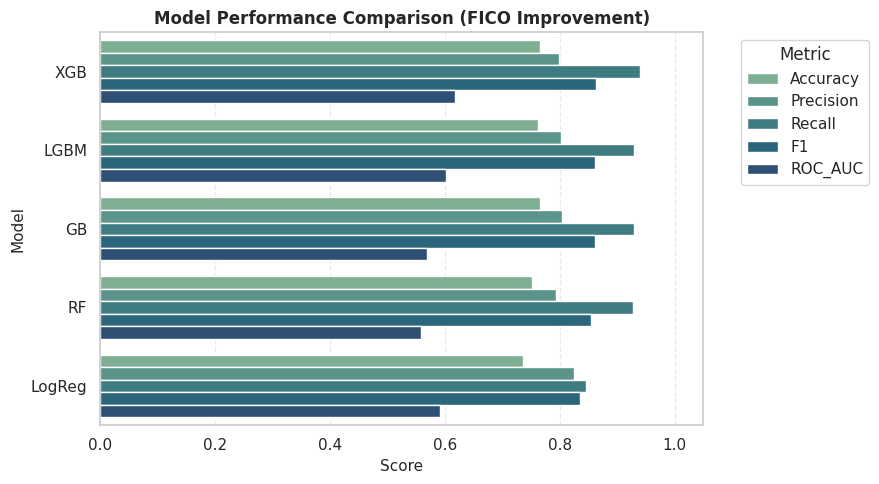


Model Ranking Summary:
1. XGB — Avg Score: 0.7968
2. LGBM — Avg Score: 0.7911
3. GB — Avg Score: 0.7855
4. RF — Avg Score: 0.7771
5. LogReg — Avg Score: 0.7668


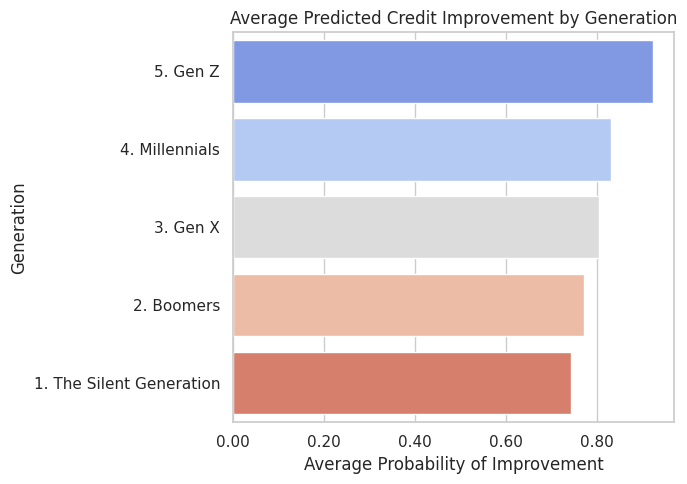

                 GENERATION  Pred_Prob_Improve
0                  5. Gen Z           0.922633
1            4. Millennials           0.831275
2                  3. Gen X           0.804688
3                2. Boomers           0.770195
4  1. The Silent Generation           0.742229


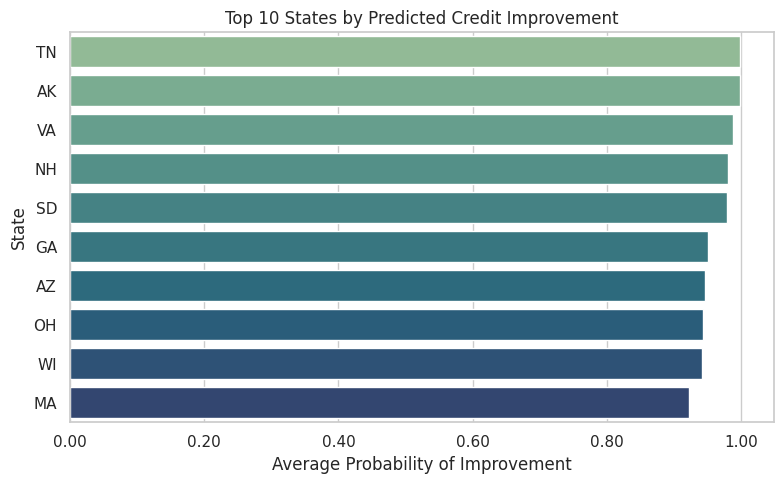

  STATE  Pred_Prob_Improve
0    TN           0.999617
1    AK           0.998889
2    VA           0.988634
3    NH           0.981702
4    SD           0.979070
5    GA           0.951425
6    AZ           0.946615
7    OH           0.944080
8    WI           0.941977
9    MA           0.922583


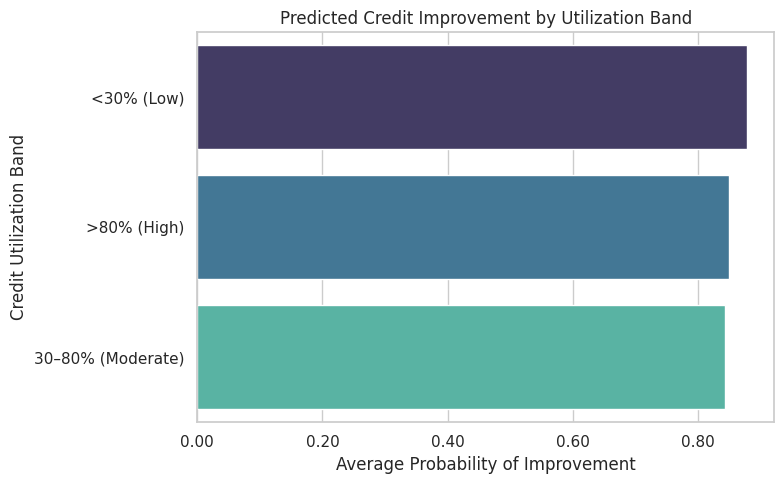

           UTIL_BAND  Pred_Prob_Improve
0         <30% (Low)           0.877633
1        >80% (High)           0.849013
2  30–80% (Moderate)           0.842446


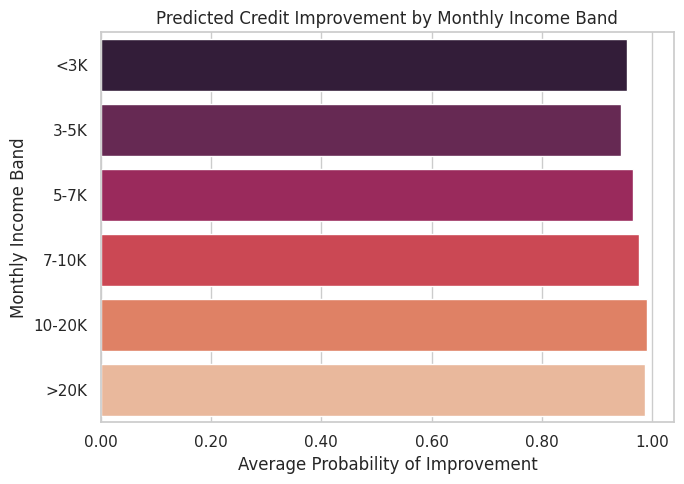

  Income_Band  Pred_Prob_Improve
0      10-20K           0.989901
1        >20K           0.987617
2       7-10K           0.976027
3        5-7K           0.965644
4         <3K           0.953769
5        3-5K           0.943866


In [ ]:


print("\n=== MODEL PERFORMANCE COMPARISON ===")
# Compute a composite average score (mean of all metrics)
results_df['Avg_Score'] = results_df[['Accuracy','Precision','Recall','F1','ROC_AUC']].mean(axis=1)
results_df = results_df.sort_values('Avg_Score', ascending=False).reset_index(drop=True)
results_df['Rank'] = results_df.index + 1

# Print ranked table
print(results_df[['Rank','Model','Accuracy','Precision','Recall','F1','ROC_AUC','Avg_Score']].to_string(index=False))

# Highlight best model
best_model_name = results_df.loc[0, 'Model']
best_avg = results_df.loc[0, 'Avg_Score']
print(f"\nBest Overall Model: {best_model_name}  (Avg Score = {best_avg:.4f})")

# --- Horizontal Comparison Chart ---
plt.figure(figsize=(9,5))
melted = results_df.melt(id_vars='Model',
                         value_vars=['Accuracy','Precision','Recall','F1','ROC_AUC'],
                         var_name='Metric', value_name='Score')

sns.barplot(data=melted, y='Model', x='Score', hue='Metric', palette='crest')

plt.title("Model Performance Comparison (FICO Improvement)", fontsize=12, weight='bold')
plt.xlabel("Score", fontsize=11)
plt.ylabel("Model", fontsize=11)
plt.xlim(0, 1.05)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Print quick recap ---
print("\nModel Ranking Summary:")
for i, row in results_df.iterrows():
    print(f"{row['Rank']}. {row['Model']} — Avg Score: {row['Avg_Score']:.4f}")


gen_map = {v:k for k,v in encoders['GENERATION'].items()}
temp = Xdf.copy()
temp['GENERATION'] = temp['GENERATION'].map(gen_map)
avg_by_gen = temp.groupby('GENERATION')['Pred_Prob_Improve'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=avg_by_gen, x='Pred_Prob_Improve', y='GENERATION', palette='coolwarm')
plt.title("Average Predicted Credit Improvement by Generation")
plt.xlabel("Average Probability of Improvement")
plt.ylabel("Generation")
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
plt.tight_layout()
plt.show()
print(avg_by_gen)

state_map = {v:k for k,v in encoders['STATE'].items()}
temp['STATE'] = temp['STATE'].map(state_map)
avg_by_state = (temp.groupby('STATE')['Pred_Prob_Improve']
                  .mean().sort_values(ascending=False).head(10).reset_index())

plt.figure(figsize=(8,5))
sns.barplot(data=avg_by_state, x='Pred_Prob_Improve', y='STATE', palette='crest')
plt.title("Top 10 States by Predicted Credit Improvement")
plt.xlabel("Average Probability of Improvement"); plt.ylabel("State")
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
plt.tight_layout(); plt.show()
print(avg_by_state)

util_map = {v:k for k,v in encoders['UTIL_BAND'].items()}
temp['UTIL_BAND'] = temp['UTIL_BAND'].map(util_map)
avg_by_util = temp.groupby('UTIL_BAND')['Pred_Prob_Improve'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=avg_by_util, x='Pred_Prob_Improve', y='UTIL_BAND', palette='mako')
plt.title("Predicted Credit Improvement by Utilization Band")
plt.xlabel("Average Probability of Improvement")
plt.ylabel("Credit Utilization Band")
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
plt.tight_layout()
plt.show()
print(avg_by_util)

# Create income bins (adjust bin ranges as needed)
temp['Income_Band'] = pd.cut(temp['MTH_INCOME_mean'],
                             bins=[0,3000,5000,7000,10000,20000,np.inf],
                             labels=['<3K','3-5K','5-7K','7-10K','10-20K','>20K'])
avg_by_income = temp.groupby('Income_Band')['Pred_Prob_Improve'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=avg_by_income, x='Pred_Prob_Improve', y='Income_Band', palette='rocket')
plt.title("Predicted Credit Improvement by Monthly Income Band")
plt.xlabel("Average Probability of Improvement")
plt.ylabel("Monthly Income Band")
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
plt.tight_layout()
plt.show()
print(avg_by_income)



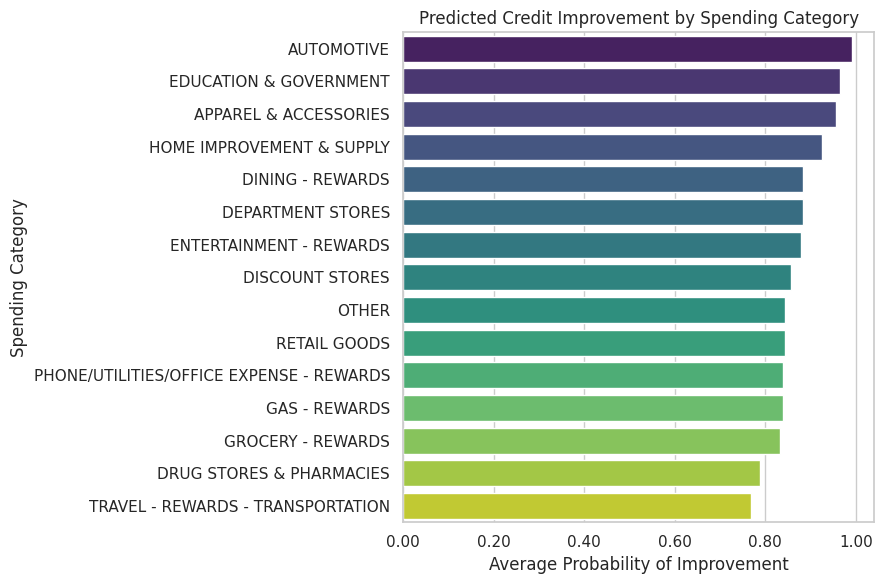

                             SPENDCATEGORYNM  Pred_Prob_Improve
0                                 AUTOMOTIVE           0.990920
1                     EDUCATION & GOVERNMENT           0.966297
2                      APPAREL & ACCESSORIES           0.957148
3                  HOME IMPROVEMENT & SUPPLY           0.924559
4                           DINING - REWARDS           0.883533
5                          DEPARTMENT STORES           0.883300
6                    ENTERTAINMENT - REWARDS           0.879870
7                            DISCOUNT STORES           0.857338
8                                      OTHER           0.844106
9                               RETAIL GOODS           0.843564
10  PHONE/UTILITIES/OFFICE EXPENSE - REWARDS           0.839281
11                             GAS - REWARDS           0.838774
12                         GROCERY - REWARDS           0.833361
13                  DRUG STORES & PHARMACIES           0.788012
14         TRAVEL - REWARDS - TRANSPORTA

In [ ]:

spend_map = {v: k for k, v in encoders['SPENDCATEGORYNM'].items()}
temp['SPENDCATEGORYNM'] = temp['SPENDCATEGORYNM'].map(spend_map)

avg_by_spend = (
    temp.groupby('SPENDCATEGORYNM')['Pred_Prob_Improve']
        .mean()
        .sort_values(ascending=False)
        .head(15)  # top 15 categories
        .reset_index()
)

plt.figure(figsize=(9,6))
sns.barplot(
    data=avg_by_spend,
    x='Pred_Prob_Improve',
    y='SPENDCATEGORYNM',
    palette='viridis'
)
plt.title("Predicted Credit Improvement by Spending Category")
plt.xlabel("Average Probability of Improvement")
plt.ylabel("Spending Category")
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
plt.tight_layout()
plt.show()

print(avg_by_spend)


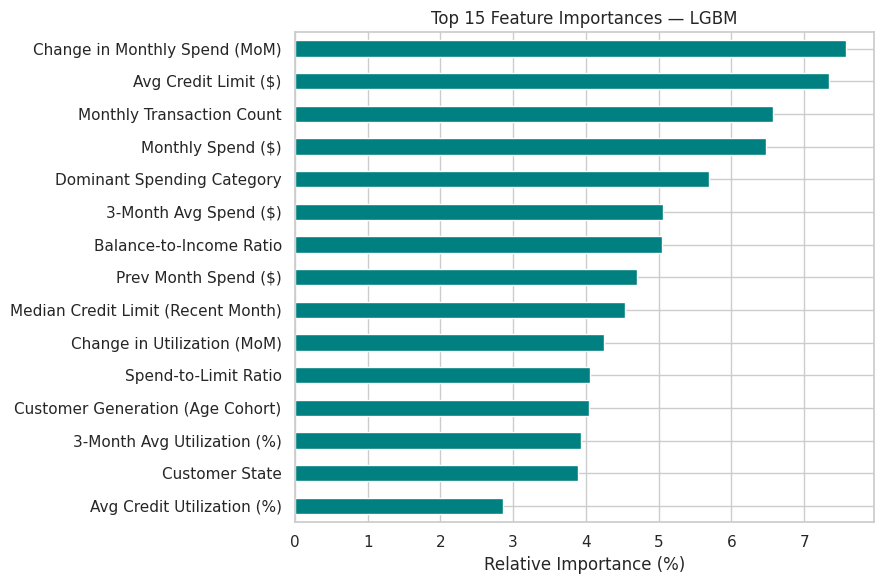


Top 10 Most Influential Features:
Change in Monthly Spend (MoM)         7.58
Avg Credit Limit ($)                  7.34
Monthly Transaction Count             6.58
Monthly Spend ($)                     6.47
Dominant Spending Category            5.69
3-Month Avg Spend ($)                 5.06
Balance-to-Income Ratio               5.04
Prev Month Spend ($)                  4.70
Median Credit Limit (Recent Month)    4.53
Change in Utilization (MoM)           4.24
dtype: float64


In [ ]:

rename_map = {
    # === Spending & Transactions ===
    'monthly_spend': 'Monthly Spend ($)',
    'monthly_spend_lag1': 'Prev Month Spend ($)',
    'monthly_spend_delta1': 'Change in Monthly Spend (MoM)',
    'monthly_spend_roll3': '3-Month Avg Spend ($)',
    'monthly_txn': 'Monthly Transaction Count',

    # === Balance, Limit & Income ===
    'END_OF_MTH_BALANCE_mean': 'Avg End-of-Month Balance ($)',
    'CREDIT_LMT_mean': 'Avg Credit Limit ($)',
    'MTH_INCOME_mean': 'Avg Monthly Income ($)',
    'BAL_TO_INCOME': 'Balance-to-Income Ratio',
    'BAL_TO_LIMIT_mean': 'Balance-to-Limit Ratio',
    'SPEND_TO_LIMIT_sum': 'Spend-to-Limit Ratio',

    # === Utilization Behavior ===
    'UTILIZATION_mean': 'Avg Credit Utilization (%)',
    'util_mean_delta1': 'Change in Utilization (MoM)',
    'util_mean_roll3': '3-Month Avg Utilization (%)',
    'util_mean_lag1': 'Prev Month Utilization (%)',

    # === Categories & Segments ===
    'SPENDCATEGORYNM': 'Dominant Spending Category',
    'GENERATION': 'Customer Generation (Age Cohort)',
    'STATE': 'Customer State',
    'UTIL_BAND': 'Utilization Band',
    'NEW_TO_CREDIT': 'New-to-Credit Indicator',

    # === Misc Derived Features ===
    'limit_med': 'Median Credit Limit (Recent Month)',
    'income_med': 'Median Income (Recent Month)',
    'bal_mean_delta1': 'Change in Balance (MoM)',
    'bal_mean_lag1': 'Prev Month Balance ($)',
    'bal_mean_roll3': '3-Month Avg Balance ($)',
    'UTILxLIMIT': 'Utilization × Limit Interaction'
}

# Pick first tree-based model with FI
for name in ['LGBM','XGB','RF','GB']:
    if name in best_models and hasattr(best_models[name], 'feature_importances_'):
        fi_raw = pd.Series(best_models[name].feature_importances_, index=features)
        fi_norm = (fi_raw / fi_raw.sum()) * 100
        fi_sorted = fi_norm.sort_values(ascending=True)

        # Apply readable labels
        fi_sorted.index = fi_sorted.index.map(lambda x: rename_map.get(x, x))

        # Plot
        plt.figure(figsize=(9,6))
        fi_sorted.tail(15).plot(kind='barh', color='#008080')
        plt.title(f"Top 15 Feature Importances — {name}")
        plt.xlabel("Relative Importance (%)")
        plt.tight_layout()
        plt.show()

        print("\nTop 10 Most Influential Features:")
        print(fi_sorted.sort_values(ascending=False).head(10).round(2))
        break


[LightGBM] [Info] Number of positive: 546, number of negative: 683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000647 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7036
[LightGBM] [Info] Number of data points in the train set: 1229, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444264 -> initscore=-0.223876
[LightGBM] [Info] Start training from score -0.223876

=== BASE MODELS — CUSTOMER CHURN PREDICTION ===
  Model  Accuracy  Precision    Recall        F1   ROC_AUC
2  LGBM  0.776744   0.609756  0.438596  0.510204  0.787142
0    GB  0.753488   0.540000  0.473684  0.504673  0.779258
1   XGB  0.762791   0.565217  0.456140  0.504854  0.775594
[LightGBM] [Info] Number of positive: 546, number of negative: 683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000711 seconds.
You can set `force_col_wise=true` to remove the overhea

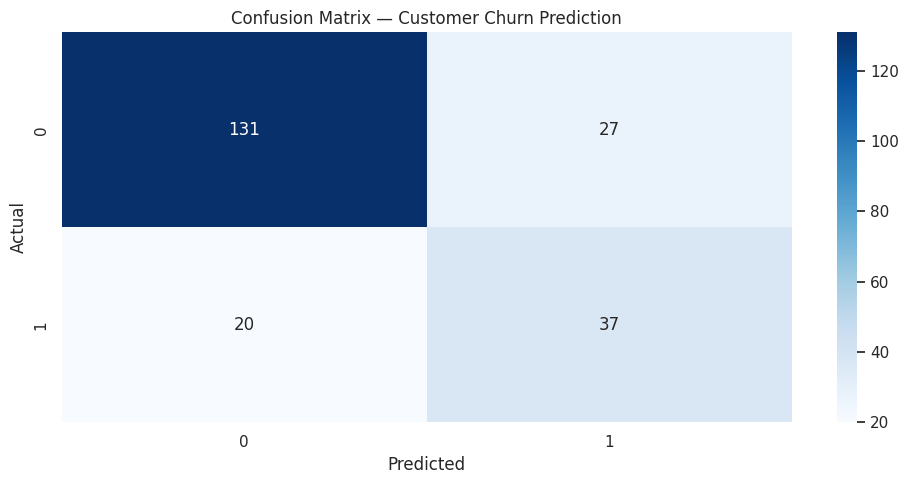

✅ Saved: customer_churn_predictions.csv


In [ ]:

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, json, warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, precision_recall_curve)
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")

df = df.copy()
df['TRANSACTIONDT'] = pd.to_datetime(df['TRANSACTIONDT'], errors='coerce')
df = df[df['TRANSACTIONDT'].notna()].sort_values(['ACCOUNT','TRANSACTIONDT'])

# Define churn target
max_date = df['TRANSACTIONDT'].max()
churn_cutoff = max_date - pd.DateOffset(months=3)
active_accounts = df.loc[df['TRANSACTIONDT'] >= churn_cutoff, 'ACCOUNT'].unique()
df['CHURNED'] = np.where(df['ACCOUNT'].isin(active_accounts), 0, 1)

# Convert to month
df['MONTH'] = df['TRANSACTIONDT'].dt.to_period('M').astype(str)

m = (
    df.groupby(['ACCOUNT','MONTH'])
      .agg(monthly_spend=('TRANSACTIONAMT','sum'),
           monthly_txn=('TRANSACTIONAMT','count'),
           util_mean=('UTILIZATION','mean'),
           bal_mean=('END_OF_MTH_BALANCE','mean'),
           income_med=('MTH_INCOME','median'),
           limit_med=('CREDIT_LMT','median'))
      .reset_index()
)

# Trend features
for col in ['monthly_spend','util_mean','bal_mean']:
    grp = m.groupby('ACCOUNT')[col]
    m[f'{col}_lag1'] = grp.shift(1)
    m[f'{col}_delta1'] = grp.diff()
    m[f'{col}_roll3']  = grp.rolling(3, min_periods=1).mean().reset_index(level=0, drop=True)
    m[f'{col}_vol3']   = grp.rolling(3, min_periods=2).std().reset_index(level=0, drop=True)
    m[f'{col}_mom3']   = grp.pct_change(periods=3)

# Latest month snapshot
m_feat = m.groupby('ACCOUNT', as_index=False).tail(1)

customer_df = (
    df.groupby('ACCOUNT')
      .agg({
          'GENERATION':'last',
          'STATE':'last',
          'SPENDCATEGORYNM': lambda x: x.mode().iloc[0] if len(x)>0 else 'Unknown',
          'UTIL_BAND':'last',
          'MTH_INCOME':'mean',
          'CREDIT_LMT':'mean',
          'UTILIZATION':'mean',
          'END_OF_MTH_BALANCE':'mean',
          'NEW_TO_CREDIT':'last',
          'FICO_AT_ACCT_OPEN':'last',
          'CHURNED':'max'
      })
      .reset_index()
      .rename(columns={
          'SPENDCATEGORYNM':'SPENDCATEGORY_MODE',
          'MTH_INCOME':'MTH_INCOME_mean',
          'CREDIT_LMT':'CREDIT_LMT_mean',
          'UTILIZATION':'UTILIZATION_mean',
          'END_OF_MTH_BALANCE':'END_OF_MTH_BALANCE_mean'
      })
)

Xdf = customer_df.merge(m_feat, on='ACCOUNT', how='left')
Xdf['TARGET_CHURN'] = Xdf['CHURNED']

Xdf['BAL_TO_LIMIT_mean']   = Xdf['END_OF_MTH_BALANCE_mean'] / (Xdf['CREDIT_LMT_mean'] + 1e-6)
Xdf['SPEND_TO_LIMIT_sum']  = Xdf['monthly_spend'] / (Xdf['limit_med'] + 1e-6)
Xdf['UTILxLIMIT']          = Xdf['UTILIZATION_mean'] * (Xdf['CREDIT_LMT_mean'].fillna(0))
Xdf['BAL_TO_INCOME']       = Xdf['END_OF_MTH_BALANCE_mean'] / (Xdf['MTH_INCOME_mean'] + 1e-6)
Xdf['LIMIT_TO_INCOME']     = Xdf['limit_med'] / (Xdf['income_med'] + 1e-6)
Xdf.replace([np.inf, -np.inf], np.nan, inplace=True)

cat_cols = ['GENERATION','STATE','SPENDCATEGORY_MODE','UTIL_BAND']
encoders={}
for c in cat_cols:
    le=LabelEncoder()
    Xdf[c]=le.fit_transform(Xdf[c].astype(str))
    encoders[c]=dict(zip(le.classes_,le.transform(le.classes_)))

drop_cols=['CHURNED','TARGET_CHURN','ACCOUNT','TRANSACTIONDT','MONTH']
features=[c for c in Xdf.columns if c not in drop_cols]
Xdf[features] = Xdf[features].fillna(Xdf[features].median())

# Split (leak-proof, account-based)
train_acc, test_acc = train_test_split(Xdf['ACCOUNT'].unique(), test_size=0.2, random_state=42)
train_df = Xdf[Xdf['ACCOUNT'].isin(train_acc)]
test_df  = Xdf[Xdf['ACCOUNT'].isin(test_acc)]

X_train, y_train = train_df[features], train_df['TARGET_CHURN']
X_test,  y_test  = test_df[features],  test_df['TARGET_CHURN']

sm = SMOTE(random_state=42, sampling_strategy=0.8)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled  = scaler.transform(X_test)

models = {
    'GB':GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,max_depth=3,random_state=42),
    'XGB':XGBClassifier(eval_metric='logloss',use_label_encoder=False,max_depth=5,
                        learning_rate=0.05,n_estimators=400,subsample=0.8,
                        colsample_bytree=0.8,random_state=42),
    'LGBM':LGBMClassifier(n_estimators=400,learning_rate=0.05,num_leaves=31,
                          subsample=0.8,random_state=42)
}

results=[]
fitted={}
for name,mdl in models.items():
    mdl.fit(X_train_scaled,y_train_res)
    y_prob=mdl.predict_proba(X_test_scaled)[:,1]
    y_pred=(y_prob>=0.5).astype(int)
    results.append({
        'Model':name,
        'Accuracy':accuracy_score(y_test,y_pred),
        'Precision':precision_score(y_test,y_pred,zero_division=0),
        'Recall':recall_score(y_test,y_pred,zero_division=0),
        'F1':f1_score(y_test,y_pred,zero_division=0),
        'ROC_AUC':roc_auc_score(y_test,y_prob)
    })
    fitted[name]=mdl

results_df=pd.DataFrame(results).sort_values('ROC_AUC',ascending=False)
print("\n=== BASE MODELS — CUSTOMER CHURN PREDICTION ===")
print(results_df)

ensemble = VotingClassifier(estimators=[(n,fitted[n]) for n in ['GB','XGB','LGBM']], voting='soft')
ensemble.fit(X_train_scaled, y_train_res)
y_prob_ens = ensemble.predict_proba(X_test_scaled)[:,1]

# Tune threshold for best F1
p,r,t = precision_recall_curve(y_test, y_prob_ens)
f1 = 2*p*r/(p+r+1e-9)
best_t = t[np.argmax(f1)] if len(t) else 0.5
print(f"\nOptimal threshold for churn = {best_t:.3f}")
y_pred_ens = (y_prob_ens >= best_t).astype(int)

print("\n--- FINAL ENSEMBLE RESULTS ---")
print(f"Accuracy: {accuracy_score(y_test,y_pred_ens):.3f}")
print(f"Precision: {precision_score(y_test,y_pred_ens):.3f}")
print(f"Recall: {recall_score(y_test,y_pred_ens):.3f}")
print(f"F1: {f1_score(y_test,y_pred_ens):.3f}")
print(f"ROC_AUC: {roc_auc_score(y_test,y_prob_ens):.3f}")

cm = confusion_matrix(y_test, y_pred_ens)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Customer Churn Prediction")
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.tight_layout(); plt.show()

Xdf['Pred_Prob_Churn'] = ensemble.predict_proba(scaler.transform(Xdf[features]))[:,1]
Xdf['Pred_Churn_Label'] = np.where(Xdf['Pred_Prob_Churn'] >= best_t, 'Likely to Churn', 'Active')
Xdf[['ACCOUNT','Pred_Prob_Churn','Pred_Churn_Label']].to_csv("customer_churn_predictions.csv", index=False)
print(" Saved: customer_churn_predictions.csv")


In [ ]:
def plot_churn_group(df, col, encoders, top_n=None, palette='Reds_r'):
    churn_df = (
        df.groupby(col)['Pred_Prob_Churn']
        .mean()
        .sort_values(ascending=False)
        .reset_index()
    )
    # Decode
    if col in encoders:
        reverse_map = {v:k for k,v in encoders[col].items()}
        churn_df[col] = churn_df[col].map(reverse_map)
    if top_n:
        churn_df = churn_df.head(top_n)
    plt.figure(figsize=(10,6))
    ax = sns.barplot(data=churn_df, x='Pred_Prob_Churn', y=col, palette=palette)
    plt.title(f"Average Predicted Churn Probability by {col}", fontsize=13, weight='bold')
    plt.xlabel("Average Probability of Churn", fontsize=11)
    plt.ylabel(col, fontsize=11)
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    for i,v in enumerate(churn_df['Pred_Prob_Churn']):
        ax.text(v + 0.005, i, f"{v:.2f}", color='black', va='center', fontsize=10)
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()
    print(churn_df)
    return churn_df

plot_churn_group(Xdf, 'GENERATION', encoders)
plot_churn_group(Xdf, 'STATE', encoders, top_n=10)
plot_churn_group(Xdf, 'UTIL_BAND', encoders)
plot_churn_group(Xdf, 'SPENDCATEGORY_MODE', encoders, top_n=10)

NameError: name 'Xdf' is not defined

In [ ]:
# df['INCOME_TO_LIMIT_RATIO'] = df['MTH_INCOME'] / df['CREDIT_LMT']
# df['BALANCE_TO_INCOME_RATIO'] = df['END_OF_MTH_BALANCE'] / (df['MTH_INCOME'] + 1)
# df['SPEND_PER_TRANSACTION'] = df['TRANSACTIONAMT'] / (df['NUM_TRANSACTIONS'] + 1)

KeyError: 'NUM_TRANSACTIONS'

In [ ]:
# df.replace([np.inf, -np.inf], np.nan, inplace=True)
# df.fillna(df.median(numeric_only=True), inplace=True)


In [ ]:
# features = [
#     'GENERATION', 'STATE', 'NEW_TO_CREDIT',
#     'MTH_INCOME', 'CREDIT_LMT', 'UTILIZATION',
#     'END_OF_MTH_BALANCE', 'INCOME_TO_LIMIT_RATIO',
#     'BALANCE_TO_INCOME_RATIO', 'TRANSACTIONAMT',
#     'NUM_TRANSACTIONS', 'SPEND_PER_TRANSACTION', 'UTIL_BAND'
# ]
# target = 'IMPROVEMENT_STATUS'


In [ ]:
# df_encoded = pd.get_dummies(df[features + [target]], drop_first=True)


In [ ]:
# X = df_encoded.drop(columns=[col for col in df_encoded.columns if col.startswith(target)])
# y = df[target]


In [ ]:
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
# )

In [ ]:
# num_cols = [
#     'MTH_INCOME', 'CREDIT_LMT', 'UTILIZATION', 'END_OF_MTH_BALANCE',
#     'INCOME_TO_LIMIT_RATIO', 'BALANCE_TO_INCOME_RATIO',
#     'TRANSACTIONAMT', 'NUM_TRANSACTIONS', 'SPEND_PER_TRANSACTION'
# ]

In [ ]:
# scaler = StandardScaler()
# X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
# X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
# rf = RandomForestClassifier(n_estimators=300, random_state=42)
# xgb = XGBClassifier(
#     random_state=42,
#     eval_metric='mlogloss',
#     learning_rate=0.05,
#     n_estimators=400,
#     max_depth=5
# )


In [ ]:

# def clean_column_names(df):
#     df.columns = (
#         df.columns.astype(str)
#         .str.replace('[', '_', regex=False)
#         .str.replace(']', '_', regex=False)
#         .str.replace('<', 'lt_', regex=False)
#         .str.replace('>', 'gt_', regex=False)
#         .str.replace(' ', '_', regex=False)
#         .str.replace(':', '_', regex=False)
#     )
#     return df

# X_train = clean_column_names(X_train)
# X_test = clean_column_names(X_test)

# rf = RandomForestClassifier(n_estimators=300, random_state=42)
# xgb = XGBClassifier(
#     random_state=42,
#     eval_metric='mlogloss',
#     learning_rate=0.05,
#     n_estimators=400,
#     max_depth=5
# )

# rf.fit(X_train, y_train)
# xgb.fit(X_train, y_train)


In [ ]:
# y_pred_rf = rf.predict(X_test)
# y_pred_xgb = xgb.predict(X_test)

In [ ]:
# print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

In [ ]:
# print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))

In [ ]:
# rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# xgb_importances = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [ ]:
# plt.figure(figsize=(10,6))
# sns.barplot(x=rf_importances.head(10), y=rf_importances.head(10).index, palette="crest")
# plt.title("Top 10 Feature Importances - Random Forest")
# plt.xlabel("Importance Score")
# plt.tight_layout()
# plt.show()

In [ ]:
# def get_metrics(y_true, y_pred, model_name, label_encoder):
#     """
#     Safely extract metrics for the 'Improved' class (after label encoding)
#     """
#     report = classification_report(
#         y_true, y_pred,
#         target_names=label_encoder.classes_,
#         output_dict=True
#     )

#     improved_key = "Improved" if "Improved" in report else list(report.keys())[0]

#     return {
#         "Model": model_name,
#         "Accuracy": accuracy_score(y_true, y_pred),
#         "Precision (Improved)": report[improved_key]["precision"],
#         "Recall (Improved)": report[improved_key]["recall"],
#         "F1 (Improved)": report[improved_key]["f1-score"]
#     }

# metrics_df = pd.DataFrame([
#     get_metrics(y_test, y_pred_rf, "Random Forest", le),
#     get_metrics(y_test, y_pred_xgb, "XGBoost", le)
# ]).round(3)

# print("\n=== MODEL PERFORMANCE COMPARISON ===")
# print(metrics_df)

In [ ]:
# plt.figure(figsize=(8,5))
# sns.barplot(
#     data=metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score"),
#     x="Metric", y="Score", hue="Model", palette="Set2"
# )
# plt.title("Model Performance Comparison: Random Forest vs XGBoost")
# plt.xticks(rotation=30)
# plt.tight_layout()
# plt.show()

In [ ]:
# X_clean = clean_column_names(X.copy())


In [ ]:
# df['Predicted_Status'] = rf.predict(X_clean)
# df['Prob_Improved'] = rf.predict_proba(X_clean)[:, le.transform(['Improved'])[0]]

In [ ]:
# sns.histplot(df['Prob_Improved'], bins=30, kde=True, color="teal")
# plt.title("Predicted Probability of Credit Improvement")
# plt.xlabel("Probability of Improvement")
# plt.show()


In [ ]:
# def readiness_label(prob):
#     if prob >= 0.75:
#         return "High likelihood to improve"
#     elif prob >= 0.55:
#         return "Moderate likelihood to improve"
#     else:
#         return "Low likelihood to improve"

# df['Graduation_Tier'] = df['Prob_Improved'].apply(readiness_label)
# df['Graduation_Tier'].value_counts(normalize=True).mul(100).round(1)


In [ ]:
# sns.countplot(data=df, x='Graduation_Tier', order=['High likelihood to improve"','Moderate likelihood to improve','Low likelihood to improve'], palette='viridis')
# plt.title("Graduation Readiness Distribution")
# plt.ylabel("Number of Customers")
# plt.xlabel("")
# plt.show()


In [ ]:
# likely_to_improve = df[df['Graduation_Tier'] == "High likelihood to improve"]
# print(likely_to_improve[['ACCOUNT', 'Prob_Improved', 'UTILIZATION', 'MTH_INCOME', 'END_OF_MONTH_FICO']].head(20))
